# Laboratorio 1 Data Science - Series de Tiempo

##### Diego Garcia # 22404
##### Cesar Lopez # 22535


Repositorio de github: 
```
https://github.com/Czar272/Lab1_DS.git

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet



C:\Users\dgv31\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Convertir de xlsx a csv

In [30]:
# FileOG = "./data/Excel/Estadisticas_historicas_comercializacion.xlsx"
# importacion = pd.read_excel(FileOG, sheet_name="IMPORTACION", engine="openpyxl")
# costoImport = pd.read_excel(FileOG, sheet_name="COSTO IMPORTACION", engine="openpyxl")
# consumo = pd.read_excel(FileOG, sheet_name="CONSUMO", engine="openpyxl")
# exportacion = pd.read_excel(FileOG, sheet_name="EXPORTACION", engine="openpyxl")

# importacionCSV = "./data/CSV/importacion.csv"
# costoImportCSV = "./data/CSV/costoImport.csv"
# consumoCSV = "./data/CSV/consumo.csv"
# exportacionCSV = "./data/CSV/exportacion.csv"

# importacion.to_csv(importacionCSV, index=False)
# costoImport.to_csv(costoImportCSV, index=False)
# consumo.to_csv(consumoCSV, index=False)
# exportacion.to_csv(exportacionCSV, index=False)

In [ ]:
# consumo_df = pd.read_csv("./data/CSV/consumo.csv")
# importacion_df = pd.read_csv("./data/CSV/importacion.csv")

# columnas_deseadas = ["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]

# consumo_filtrado = consumo_df[columnas_deseadas]
# importacion_filtrado = importacion_df[columnas_deseadas]

# consumo_filtrado.to_csv("./data/CSV/consumo.csv", index=False)
# importacion_filtrado.to_csv("./data/CSV/importacion.csv", index=False)

# print("Archivos 'consumo.csv' e 'importacion.csv' actualizados correctamente.")


Archivos 'consumo.csv' e 'importacion.csv' actualizados correctamente.


### Descripci√≥n de los datos

__IMPORTACION__

En este conjunto se registra el volumen de productos petroleros importados de forma mensual a Guatemala desde el 2001 hasta el 2024. La unidad de medici√≥n de cada una de las variables en este conjunto es de barriles*. Para este an√°lisis solo se tomaran en cuenta las columans de gasolina regular, gasolina super y diese de alto azufre.

*Un barril equivale a 42 galones.

In [32]:
importacion = pd.read_csv("./data/CSV/importacion.csv")

print("\nResumen Importaci√≥n:")
print(importacion.describe())


Resumen Importaci√≥n:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count      2.880000e+02       2.880000e+02        2.880000e+02
mean       4.129493e+05       4.909544e+05        5.541217e+05
std        2.432627e+05       1.565581e+05        4.097571e+05
min        8.101530e+04       1.702925e+05        0.000000e+00
25%        2.082069e+05       3.693299e+05        0.000000e+00
50%        3.275593e+05       4.813002e+05        6.380928e+05
75%        5.761171e+05       6.083053e+05        8.447706e+05
max        1.141366e+06       1.227174e+06        1.595699e+06


<Figure size 1000x500 with 0 Axes>

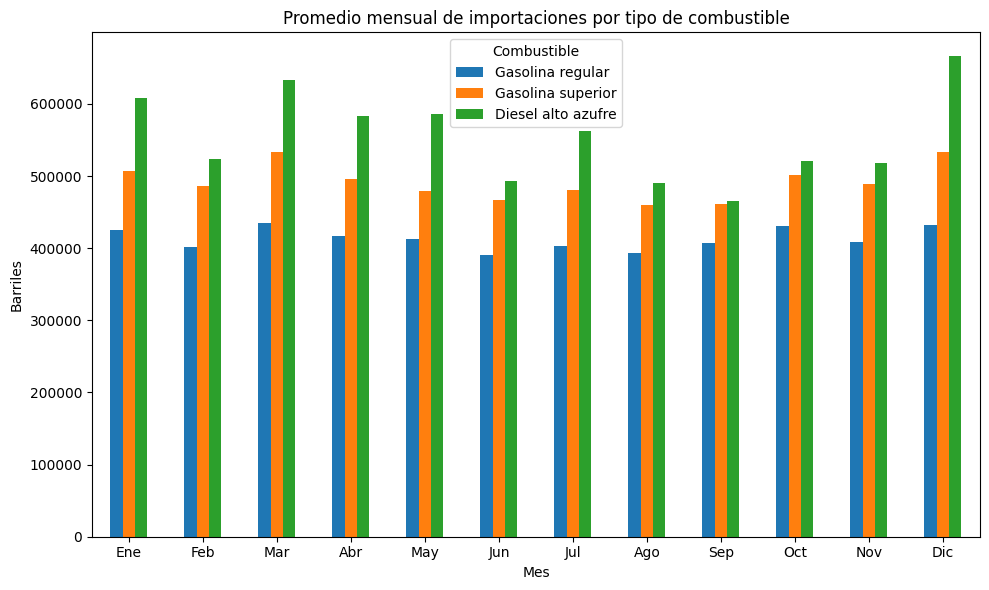

In [33]:
# Meses con m√°s importaciones
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'])
importacion['Mes'] = importacion['Fecha'].dt.month
prom_mensual_imp = importacion.groupby('Mes')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].mean()

plt.figure(figsize=(10,5))
prom_mensual_imp.plot(kind='bar', figsize=(10,6))
plt.title('Promedio mensual de importaciones por tipo de combustible')
plt.xlabel('Mes')
plt.ylabel('Barriles')
plt.xticks(ticks=range(0,12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.legend(title="Combustible")
plt.tight_layout()
plt.show()

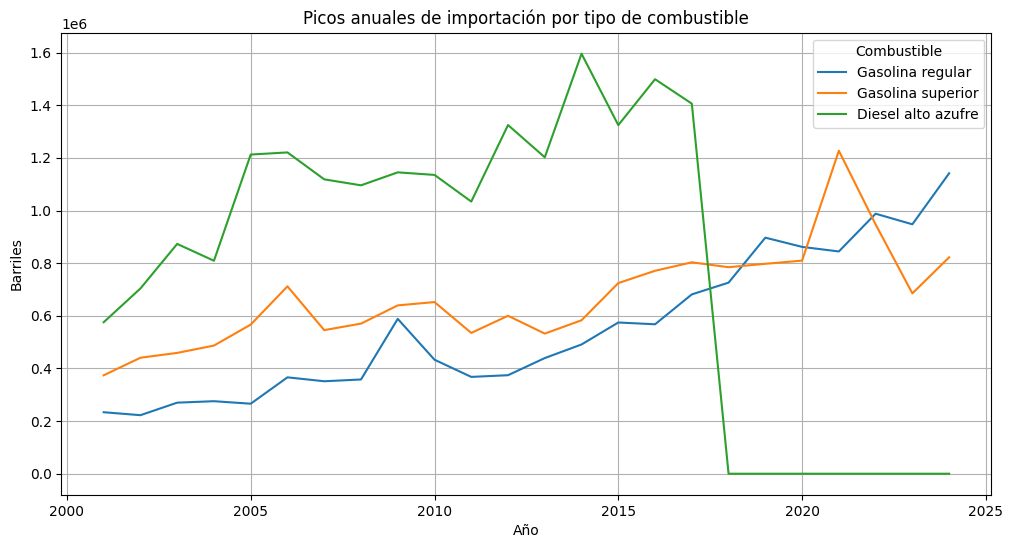

In [34]:
#Picos anuales por tipo de combustible
importacion['A√±o'] = importacion['Fecha'].dt.year
picos_imp = importacion.groupby('A√±o')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].max()

picos_imp.plot(figsize=(12,6))
plt.title('Picos anuales de importaci√≥n por tipo de combustible')
plt.ylabel('Barriles')
plt.xlabel('A√±o')
plt.grid(True)
plt.legend(title="Combustible")
plt.show()

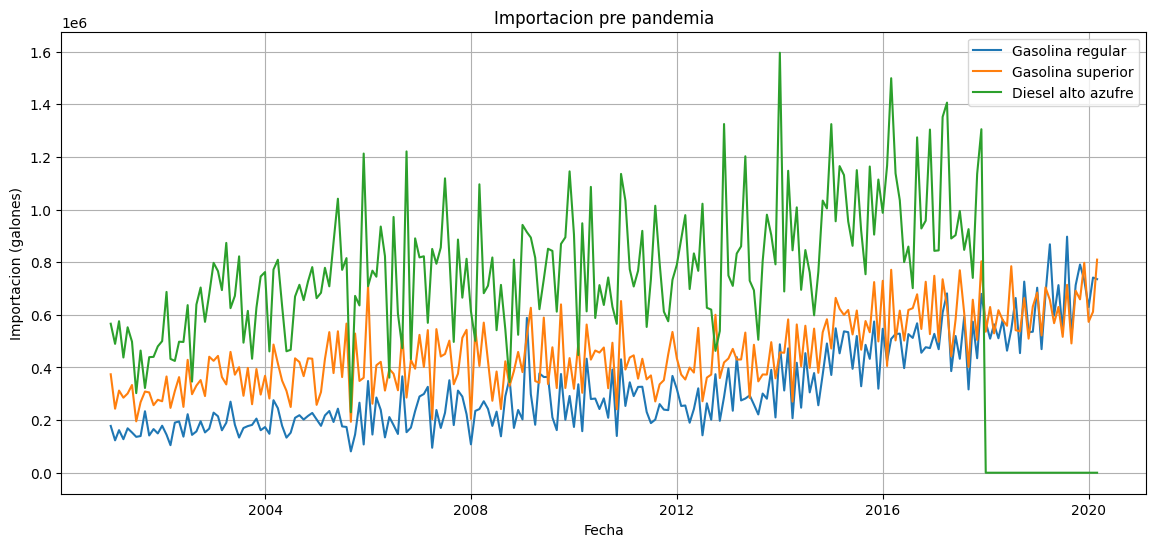

In [35]:
# Comportamiento pre pandemia
postYears = importacion[importacion['Fecha'] <= '2020-03-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Importacion pre pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importacion (galones)')
plt.legend()
plt.grid(True)
plt.show()

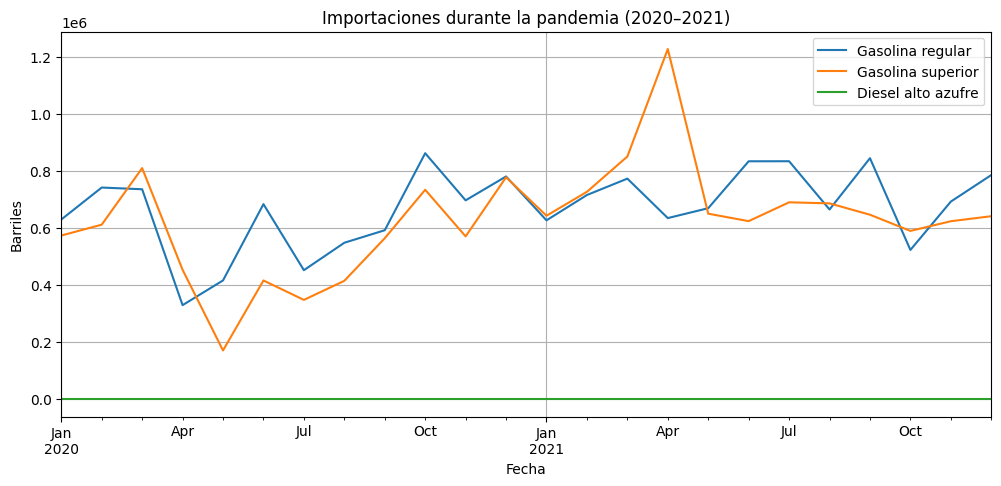

In [36]:
# Comportamiento en pandemia
mask_pandemia = (importacion['Fecha'] >= '2020-01-01') & (importacion['Fecha'] <= '2021-12-31')
imp_pandemia = importacion[mask_pandemia]

imp_pandemia.set_index('Fecha')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].plot(figsize=(12,5))
plt.title("Importaciones durante la pandemia (2020‚Äì2021)")
plt.ylabel("Barriles")
plt.grid(True)
plt.show()


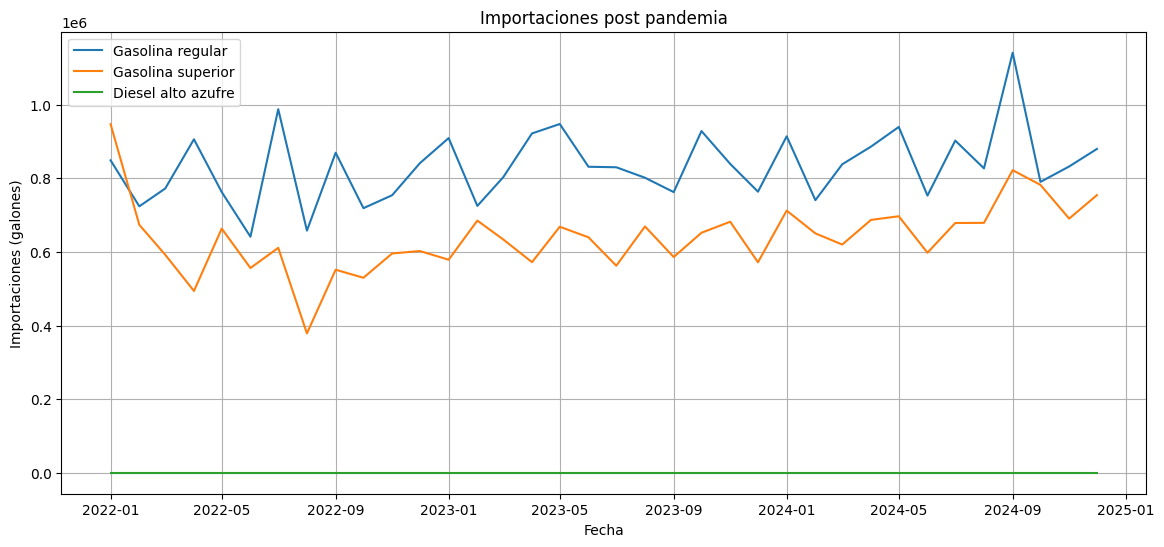

In [37]:
# Comportamiento post pandemia
postYears = importacion[importacion['Fecha'] >= '2022-01-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Importaciones post pandemia')
plt.xlabel('Fecha')
plt.ylabel('Importaciones (galones)')
plt.legend()
plt.grid(True)
plt.show()


__CONSUMO__

Este conjunto representa el consumo mensual interno de diferentes productos petroleros en Guatemala. La unidad en la que se mide cada variable es en barriles*. Los registros en este conjunto van del 2000 al 2024.Para este an√°lisis solo se tomaran en cuenta las columans de gasolina regular, gasolina super y diese de alto azufre.

*Un barril equivale a 42 galones.

In [38]:
consumo = pd.read_csv("./data/CSV/consumo.csv")

print("Resumen Consumo:")
print(consumo.describe())

Resumen Consumo:
       Gasolina regular  Gasolina superior  Diesel alto azufre
count        300.000000         300.000000        3.000000e+02
mean      397478.894458      470248.678849        5.144313e+05
std       219102.049432      113504.653305        3.688977e+05
min       160741.900000      300242.781667        0.000000e+00
25%       215650.312917      383931.904375        0.000000e+00
50%       288193.130000      423319.540000        6.721700e+05
75%       548073.682500      573704.195000        7.791021e+05
max       938086.570000      786598.120000        1.149175e+06


<Figure size 1000x500 with 0 Axes>

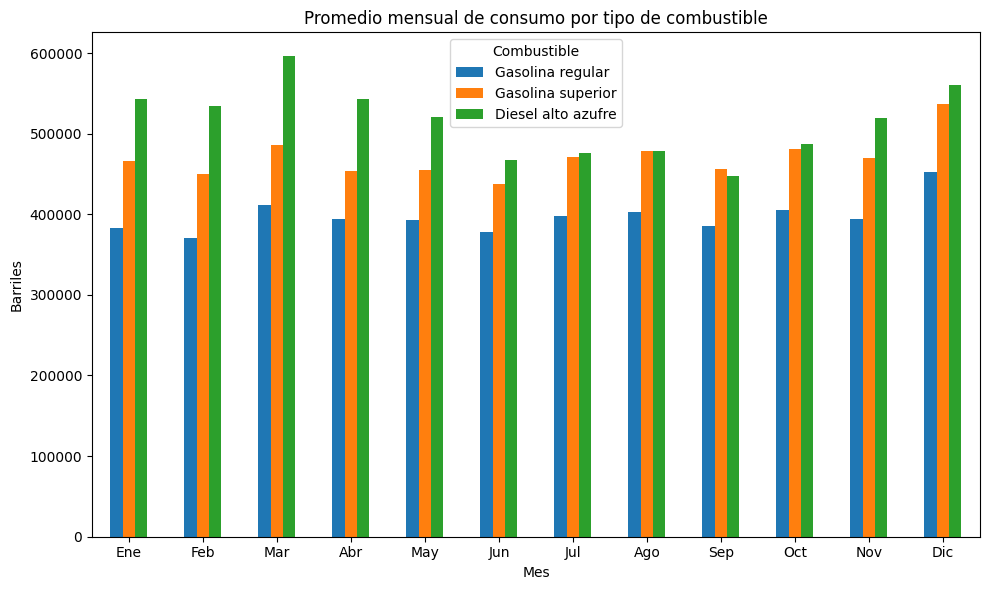

In [39]:
#meses con m√°s consumo
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'])
consumo['Mes'] = consumo['Fecha'].dt.month
prom_mensual_con = consumo.groupby('Mes')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].mean()

plt.figure(figsize=(10,5))
prom_mensual_con.plot(kind='bar', figsize=(10,6))
plt.title('Promedio mensual de consumo por tipo de combustible')
plt.xlabel('Mes')
plt.ylabel('Barriles')
plt.xticks(ticks=range(0,12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.legend(title="Combustible")
plt.tight_layout()
plt.show()

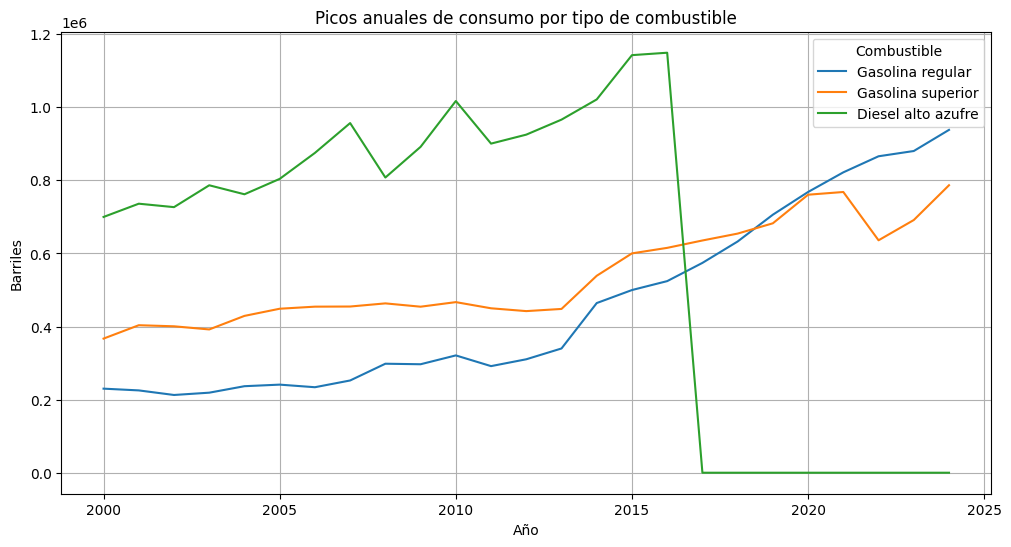

In [40]:
#picos anuales por tipo de combustible
consumo['A√±o'] = consumo['Fecha'].dt.year
picos_con = consumo.groupby('A√±o')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].max()

picos_con.plot(figsize=(12,6))
plt.title('Picos anuales de consumo por tipo de combustible')
plt.ylabel('Barriles')
plt.xlabel('A√±o')
plt.grid(True)
plt.legend(title="Combustible")
plt.show()

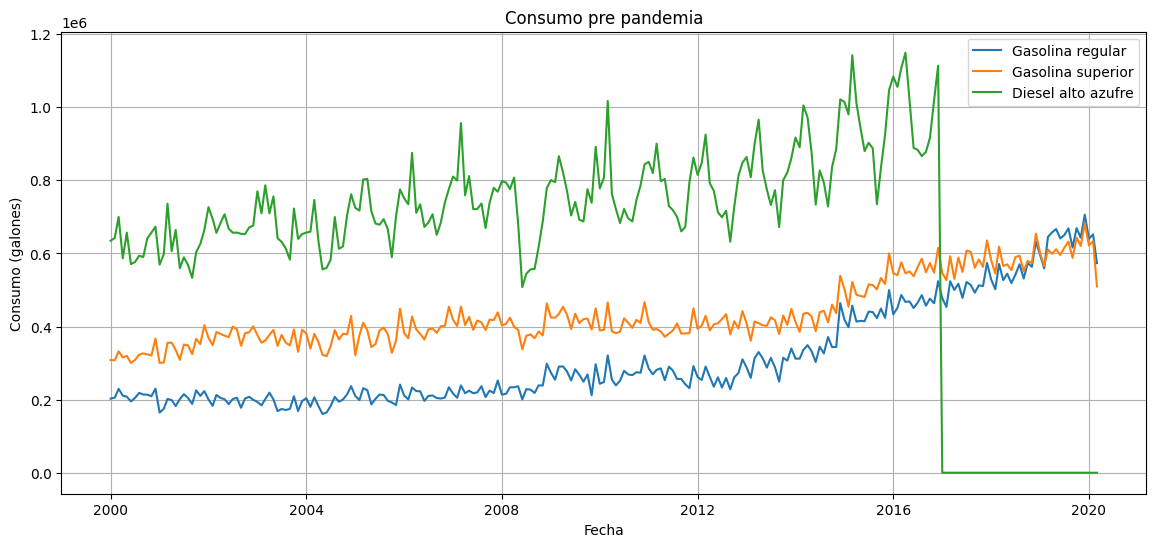

In [41]:
# Comportamiento pre pandemia
postYears = consumo[consumo['Fecha'] <= '2020-03-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Consumo pre pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo (galones)')
plt.legend()
plt.grid(True)
plt.show()

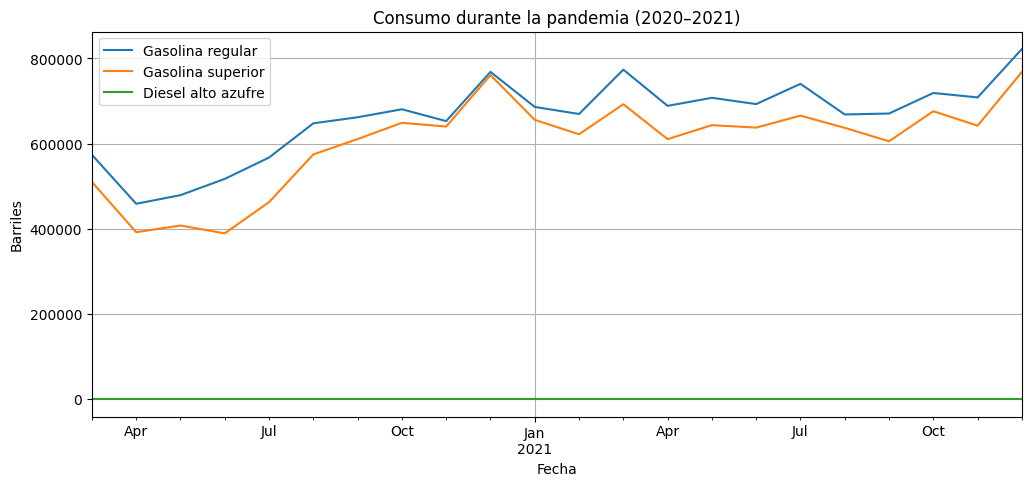

In [42]:
# Comportamiento en pandemia
mask_pandemia_con = (consumo['Fecha'] >= '2020-03-01') & (consumo['Fecha'] <= '2021-12-31')
con_pandemia = consumo[mask_pandemia_con]

con_pandemia.set_index('Fecha')[["Gasolina regular", "Gasolina superior", "Diesel alto azufre"]].plot(figsize=(12,5))
plt.title("Consumo durante la pandemia (2020‚Äì2021)")
plt.ylabel("Barriles")
plt.grid(True)
plt.show()

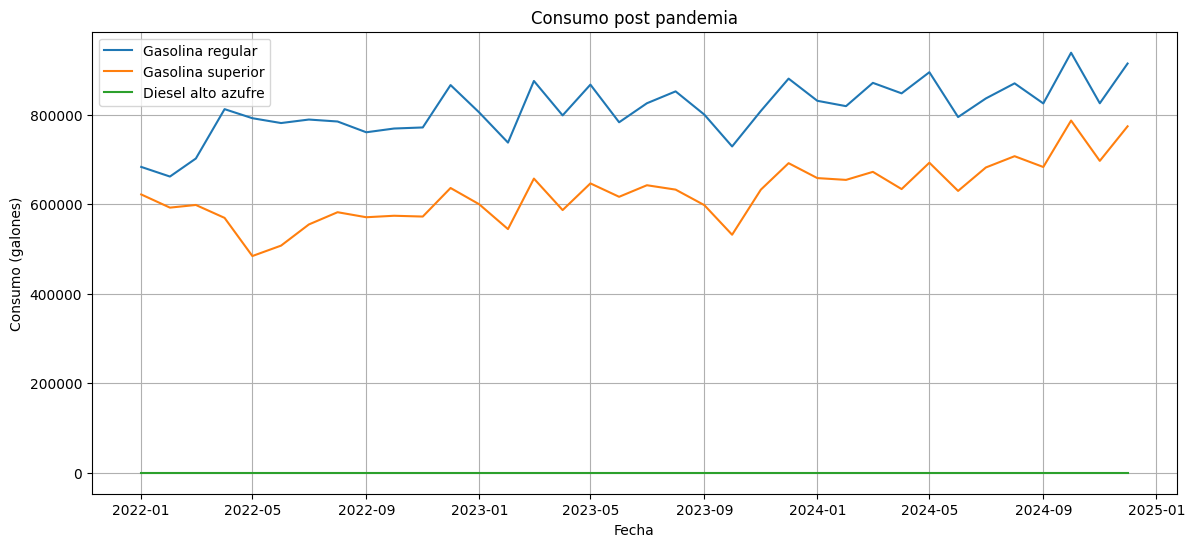

In [43]:
# Comportamiento post pandemia
postYears = consumo[consumo['Fecha'] >= '2022-01-1']

plt.figure(figsize=(14, 6))
for tipo in ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']:
    plt.plot(postYears['Fecha'], postYears[tipo], label=tipo)
plt.title('Consumo post pandemia')
plt.xlabel('Fecha')
plt.ylabel('Consumo (galones)')
plt.legend()
plt.grid(True)
plt.show()

### Series Univariantes

##### __Importacion (Gasolina superior, Gasolina regular, Diesel)__

In [44]:
file_path = "./data/CSV/importacion.csv"
df = pd.read_csv(file_path)

In [45]:
df = df[pd.to_datetime(df['Fecha'], errors='coerce').notna()]
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Preprocessing para diesel alto azufre
serie_diesel = df[['Fecha', 'Diesel alto azufre']].copy()
serie_diesel.rename(columns={'Diesel alto azufre': 'Diesel'}, inplace=True)

serie_gasolina_regular = df[['Fecha', 'Gasolina regular']].set_index('Fecha')
serie_gasolina_regular = serie_gasolina_regular.asfreq('MS')  # Frecuencia mensual

serie_gasolina_superior = df[['Fecha', 'Gasolina superior']].set_index('Fecha')
serie_gasolina_superior = serie_gasolina_superior.asfreq('MS')  # Frecuencia mensual

serie_diesel.set_index('Fecha', inplace=True)
serie_diesel = serie_diesel.asfreq('MS')


In [46]:
print("Gasolina Regular: \n")
print("Inicio:", serie_gasolina_regular.index.min())
print("Fin:", serie_gasolina_regular.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_regular.index))

print("\nGasolina Superior: \n")
print("Inicio:", serie_gasolina_superior.index.min())
print("Fin:", serie_gasolina_superior.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_superior.index))

print("\nDiesel: \n")
print("Inicio:", serie_diesel.index.min())
print("Fin:", serie_diesel.index.max())
print("Frecuencia:", pd.infer_freq(serie_diesel.index))

Gasolina Regular: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Gasolina Superior: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Diesel: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS


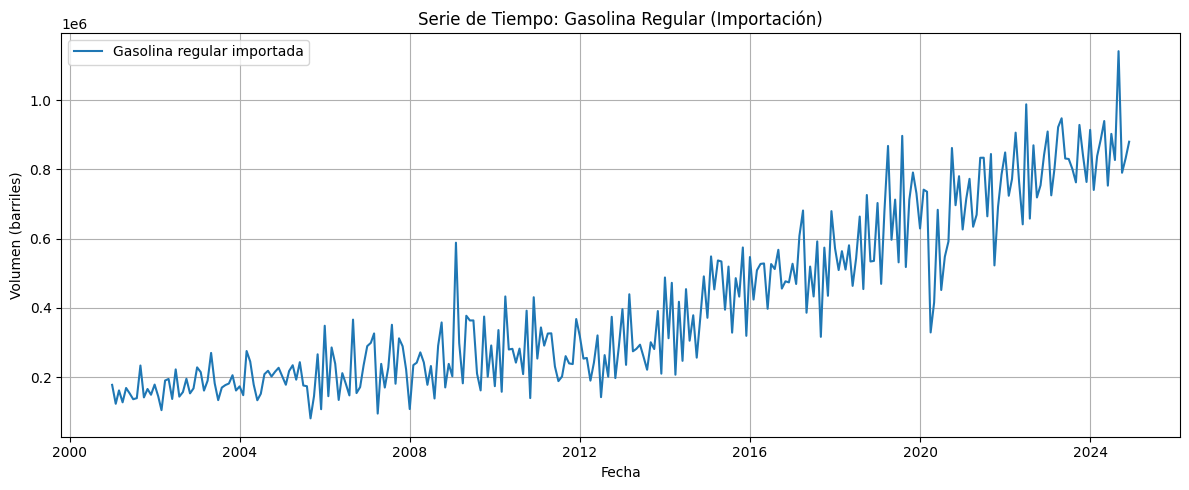

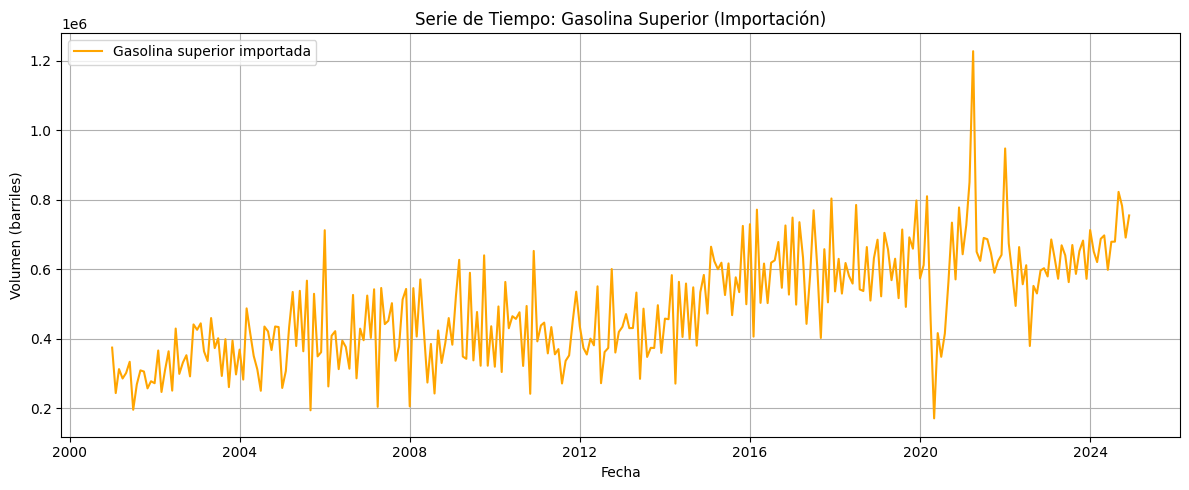

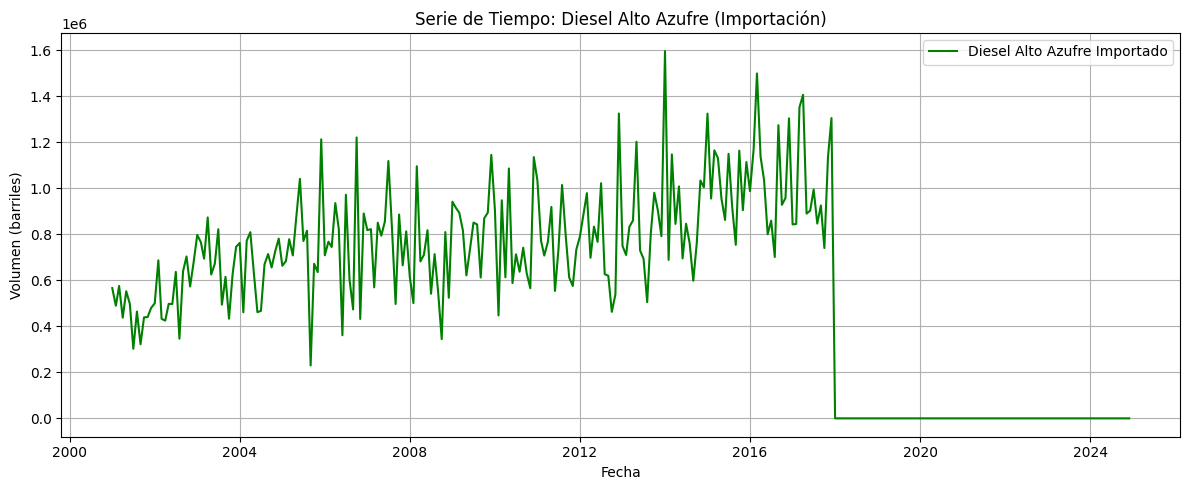

In [47]:
# === Gr√°fico de la serie Gasolina regular Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_regular, label='Gasolina regular importada')
plt.title('Serie de Tiempo: Gasolina Regular (Importaci√≥n)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gr√°fico de la serie Gasolina superior Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_superior, label='Gasolina superior importada', color='orange')
plt.title('Serie de Tiempo: Gasolina Superior (Importaci√≥n)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gr√°fico de la serie Diesel ===
plt.figure(figsize=(12, 5))
plt.plot(serie_diesel, label='Diesel Alto Azufre Importado', color='green')
plt.title('Serie de Tiempo: Diesel Alto Azufre (Importaci√≥n)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


-  __Analisis Graficas__

A primera vista se puede ver lo siguiente: 

Para la gasolina regular podemos ver que ha ido en un crecimiento normal, teniendo un pico aproximadamente en el 2009 en importaciones, un bajon a mediados de 2020, en general un crecimiento normal, notando que desde 2012 empezo a tener una pendiente un poco mas inclinada.

Para la gasolina superior, a comparacion de la gasolina regular, esta grafica se ve mas irregular, entre el a√±o 2020 y 2022, se nota mucha variacion llegando a valores muy bajos y muy altos en poco tiempo. Fuera de esos a√±os, un crecimiento bastante lento en comparacion con la gasolina regular.

Para el Diesel de alto azufre, lo que mas sobresale es que en el 2018, todo llego a 0, lo cual es poco probable, entonces nos lleva a pensar que es un error de recopilacion de data. Ademas de eso, podemos notar que a comparacion de los otros tipos de gasolina, que este empieza con un nivel de volumen mas alto. Es bastante mas irregular que las otras, aunque siempre va en crecimiento.

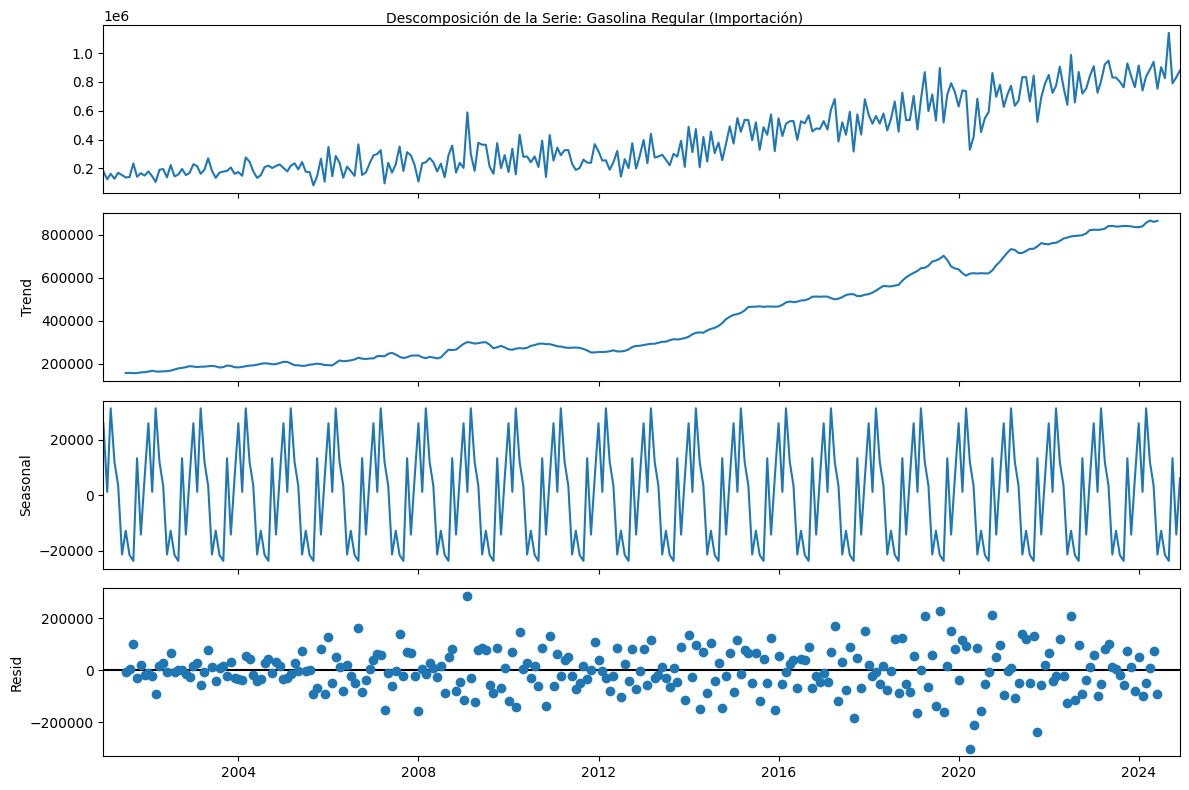

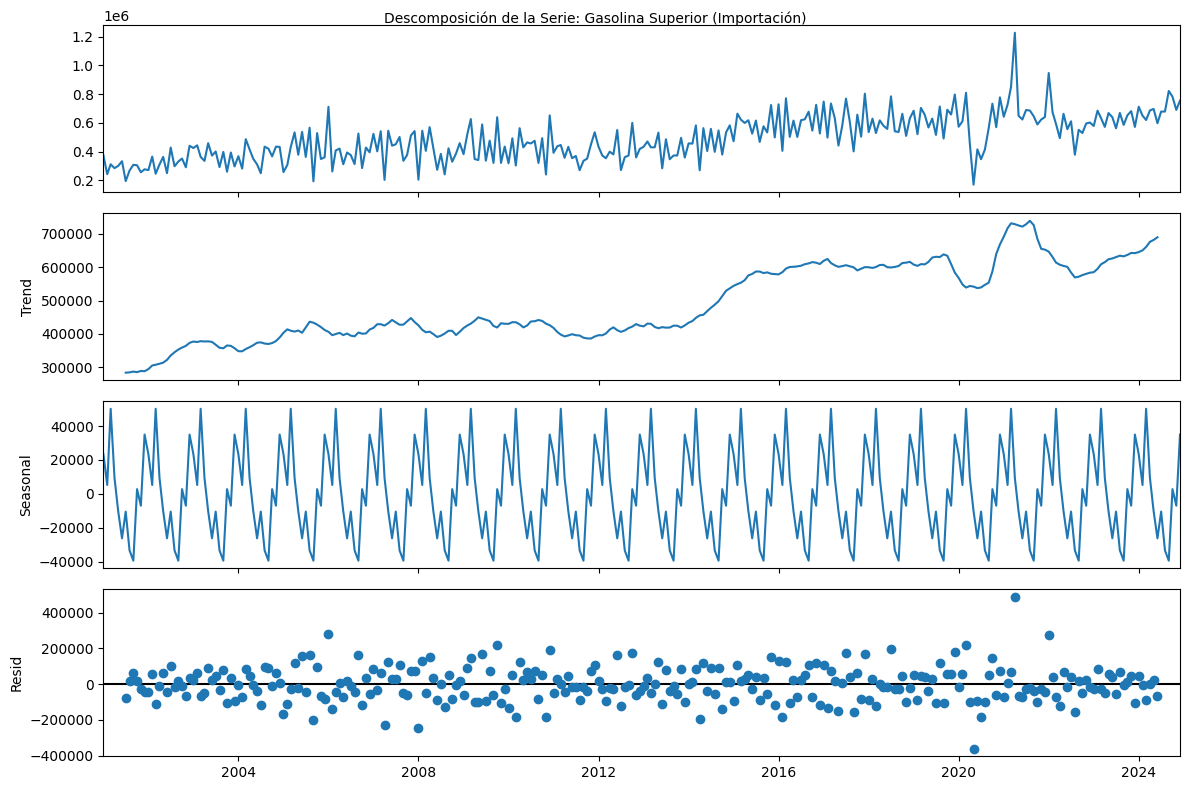

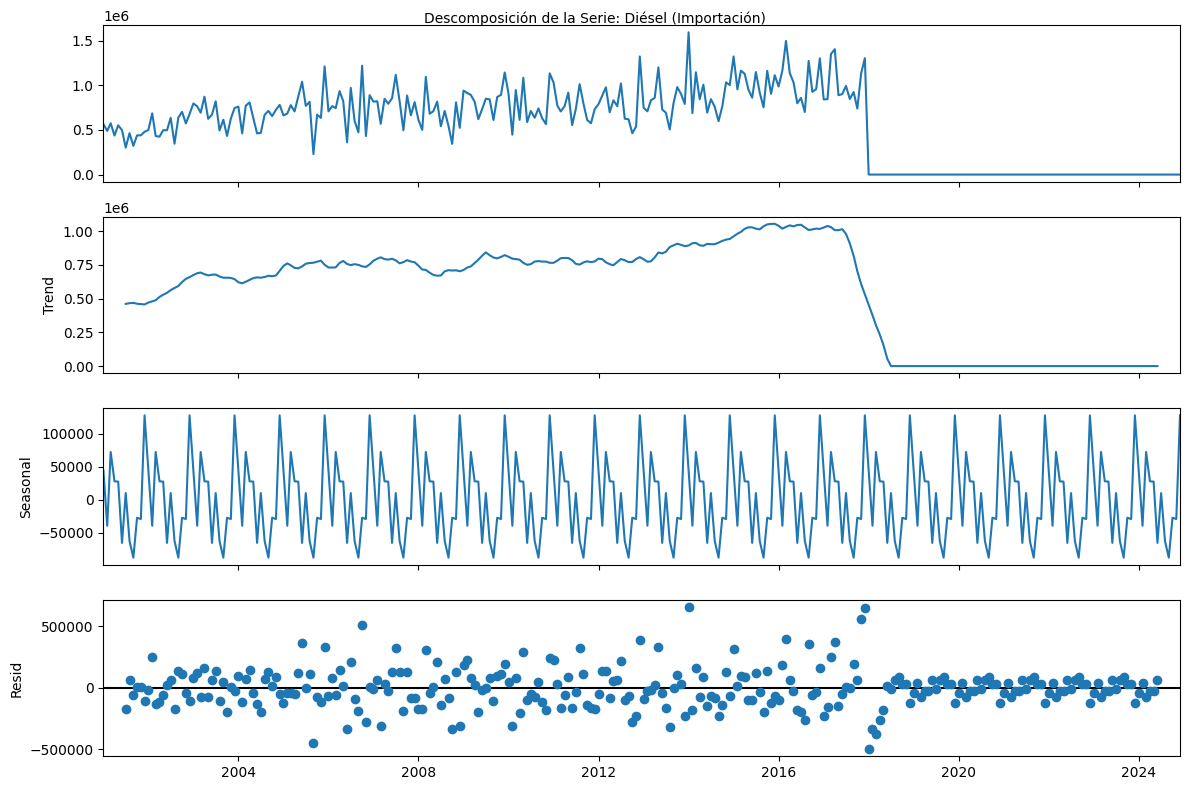

In [48]:
regular_decompose = seasonal_decompose(serie_gasolina_regular, model='additive')
super_decompose = seasonal_decompose(serie_gasolina_superior, model='additive')
diesel_decompose = seasonal_decompose(serie_diesel, model='additive')

# Gr√°fica de los componentes Regular Importacion
plt.rcParams.update({'figure.figsize': (12, 8)})
regular_decompose.plot()
plt.suptitle("Descomposici√≥n de la Serie: Gasolina Regular (Importaci√≥n)", fontsize=10)
plt.show()


# Gr√°fica de los componentes Super Importaci√≥n
plt.rcParams.update({'figure.figsize': (12, 8)})
super_decompose.plot()
plt.suptitle("Descomposici√≥n de la Serie: Gasolina Superior (Importaci√≥n)", fontsize=10)
plt.show()

# Gr√°fica de los componentes Di√©sel Importaci√≥n
plt.rcParams.update({'figure.figsize': (12, 8)})
diesel_decompose.plot()
plt.suptitle("Descomposici√≥n de la Serie: Di√©sel (Importaci√≥n)", fontsize=10)
plt.show()


-  __Analisis de los componentes gasolina superior importacion__


    - __Trend:__
La componente de tendencia muestra un crecimiento sostenido en las importaciones de gasolina regular desde el a√±o 2001 hasta alrededor de 2023. Este crecimiento no es lineal, pero s√≠ constante en el largo plazo, con algunos per√≠odos de desaceleraci√≥n o estabilizaci√≥n, especialmente entre 2014 y 2016, y una ca√≠da moderada alrededor del 2020, posiblemente relacionada con la pandemia de COVID-19. El hecho de que la media de la serie se incremente a lo largo del tiempo indica que la serie no es estacionaria en media, ya que la tendencia altera la estabilidad del nivel general de la serie temporal.


    - __Seasonal:__ 
La componente estacional refleja un patr√≥n claro y repetitivo a lo largo de cada a√±o. Espec√≠ficamente, se observan aumentos y disminuciones regulares con la misma estructura mes a mes, lo que indica una estacionalidad mensual fuerte. Este comportamiento sugiere que las importaciones de gasolina regular siguen un patr√≥n c√≠clico anual, probablemente vinculado al consumo estacional, vacaciones, actividades econ√≥micas o pol√≠ticas de abastecimiento. La estacionalidad se mantiene bastante constante en amplitud, lo cual es √∫til para modelar y prever el comportamiento futuro.


    - __Resid:__ 
Los residuos, es decir, la parte no explicada por la tendencia ni la estacionalidad, parecen oscilar alrededor de cero y no muestran una tendencia visible ni cambios significativos en su dispersi√≥n a lo largo del tiempo. Esto sugiere que los residuos son ruido aleatorio con varianza aproximadamente constante, lo cual es un buen indicio para modelar. Aunque se observan algunos puntos at√≠picos (especialmente entre 2020 y 2021), no hay una evidencia clara de que la varianza cambie sistem√°ticamente, por lo que se puede decir que la serie es aproximadamente estacionaria en varianza.

-  __An√°lisis de los componentes Gasolina Superior (Importaci√≥n)__


    - __Trend:__
La componente de tendencia muestra un crecimiento sostenido en las importaciones de gasolina superior desde 2001 hasta 2023. Este crecimiento no es estrictamente lineal, pero s√≠ continuo, con ciertos periodos de desaceleraci√≥n (como entre 2014 y 2016) y una ca√≠da transitoria alrededor del 2020, coherente con la disrupci√≥n econ√≥mica causada por la pandemia. La presencia de esta tendencia ascendente implica que la serie no es estacionaria en media, pues el nivel promedio var√≠a con el tiempo.


    - __Seasonal:__ 
La estacionalidad en esta serie es clara y bien estructurada, con oscilaciones regulares a lo largo de los a√±os. Se presenta una estacionalidad mensual consistente, en la que se repiten patrones similares cada a√±o, probablemente relacionados con el comportamiento estacional de la demanda. La estabilidad en la amplitud del componente estacional sugiere que este patr√≥n se mantiene constante a lo largo del tiempo.


    - __Resid:__ 
Los residuos de la serie oscilan en torno a cero, con dispersi√≥n relativamente constante a lo largo del tiempo. No se observan patrones sistem√°ticos ni tendencias marcadas, lo que sugiere que los errores son esencialmente aleatorios. Existen algunos puntos at√≠picos, especialmente cerca del 2020, pero en general no comprometen la estacionaridad en varianza. Esto indica que los principales componentes de la serie han sido adecuadamente capturados por la descomposici√≥n.


-  __An√°lisis de los componentes Gasolina Superior (Importaci√≥n)__

    - __Trend:__
La componente de tendencia en la serie de importaci√≥n de di√©sel muestra una trayectoria m√°s variable que en las gasolinas. Si bien existe un crecimiento general desde 2001, se aprecian m√°s fluctuaciones a lo largo del tiempo, con ca√≠das visibles entre 2008‚Äì2009 y una reducci√≥n importante en 2020. Estas oscilaciones pueden reflejar una mayor sensibilidad del mercado de di√©sel a factores externos. La variaci√≥n del nivel medio a lo largo del tiempo indica que la serie no es estacionaria en media.


    - __Seasonal:__ 
El componente estacional es igualmente fuerte y definido. Las oscilaciones estacionales se presentan con una forma y amplitud relativamente constantes a√±o con a√±o, lo que indica una estacionalidad mensual robusta. Esto puede deberse a la estacionalidad de la actividad industrial o del transporte, que influye directamente en el consumo de di√©sel. Esta regularidad hace viable incorporar esta estacionalidad en modelos futuros.


    - __Resid:__ 
Los residuos parecen estar centrados en cero y muestran una varianza relativamente estable, aunque con algunos picos aislados ‚Äînuevamente, notables entre 2020 y 2021‚Äî. La ausencia de patrones definidos o autocorrelaci√≥n aparente sugiere que los residuos son mayormente aleatorios. Esto indica que la estructura principal de la serie ha sido bien capturada y que el remanente no afecta significativamente la estacionaridad en varianza.

- __¬øEs necesario transformar la serie? (Importacino)__
    - Gasolina Regular: 
    
    En esta serie se nota claramente que las importaciones han ido aumentando con el tiempo. La tendencia va en subida desde 2001 hasta 2023, aunque hay momentos donde se estanca un poco o cae (como en 2020, probablemente por la pandemia). Por eso, la serie no se mantiene estable en su nivel, y ser√≠a buena idea transformarla para que sea m√°s f√°cil de modelar. 
    
    La estacionalidad (es decir, los cambios que se repiten cada a√±o) es clara y bastante constante, lo que ayuda a entender el patr√≥n anual. 
    
    Los residuos (el "ruido") no se ven tan extremos ni cambian mucho en su tama√±o, as√≠ que no parece necesario usar transformaciones m√°s complejas como logaritmos. 
    
    - Gasolina Superior: 
    
    Esta serie es muy parecida a la de gasolina regular. Tambi√©n va creciendo de forma bastante consistente desde 2001, con algunas pausas y una ca√≠da en 2020. Como cambia su promedio a lo largo del tiempo, tambi√©n ser√≠a necesario hacer una transformaci√≥n para que el modelo funcione bien. 
    
    Al igual que la anterior, tiene una estacionalidad clara y que se repite cada a√±o. Esto es √∫til para futuros modelos.
    
    Los residuos no se ven muy raros ni con grandes cambios, as√≠ que no parece que haya problemas de varianza cambiante.
    
    - Diesel:
    
    La serie de di√©sel tambi√©n muestra un crecimiento general, pero en este caso se ve m√°s inestable, con subidas y bajadas m√°s marcadas a lo largo del tiempo. En especial, hay ca√≠das claras como en 2009 y 2020.
    
    La estacionalidad sigue estando presente y es bastante parecida a√±o con a√±o. Pero algo que llama la atenci√≥n es que algunas variaciones parecen m√°s grandes en ciertos a√±os, lo que podr√≠a indicar que el comportamiento no es tan regular en t√©rminos de amplitud.
    
    Los residuos tambi√©n parecen un poco m√°s dispersos que en las otras dos series.

- __Es estacionaria en media?__ 


--- An√°lisis de estacionariedad para: Gasolina Regular (Importaci√≥n) ---
Gr√°fico de Autocorrelaci√≥n (ACF):


<Figure size 1000x400 with 0 Axes>

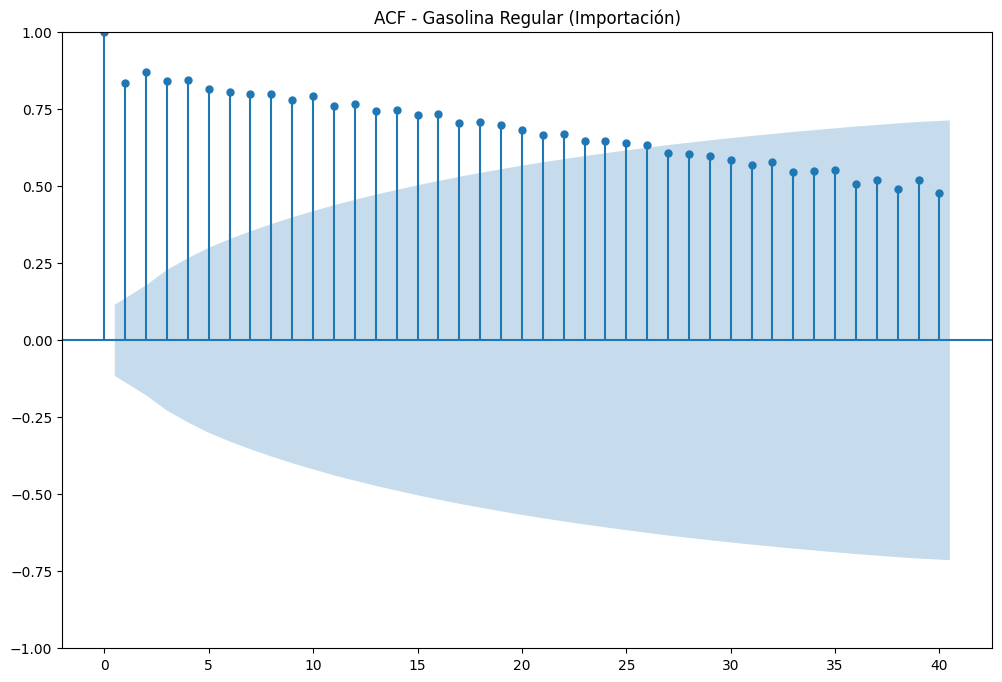

Resultado de la prueba ADF:
ADF Statistic: 0.8302
p-value: 0.9921
# Lags Used: 9.0000
Number of Observations Used: 278.0000
Valor cr√≠tico 1%: -3.4541
Valor cr√≠tico 5%: -2.8720
Valor cr√≠tico 10%: -2.5723
No se puede rechazar la hip√≥tesis nula. La serie NO es estacionaria en media.

--- An√°lisis de estacionariedad para: Gasolina Superior (Importaci√≥n) ---
Gr√°fico de Autocorrelaci√≥n (ACF):


<Figure size 1000x400 with 0 Axes>

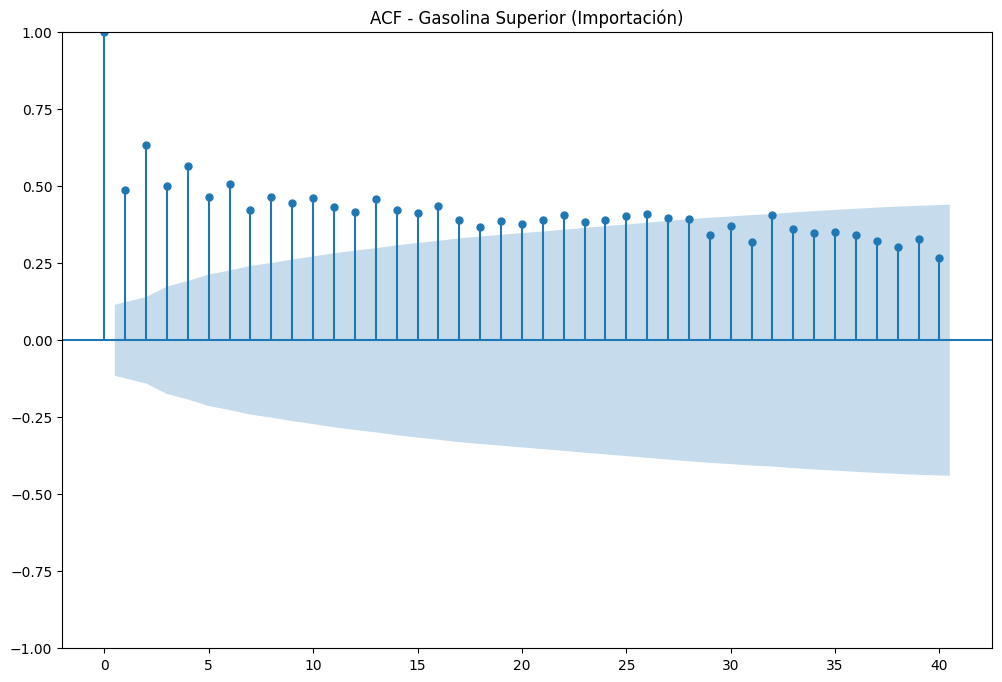

Resultado de la prueba ADF:
ADF Statistic: -1.6020
p-value: 0.4826
# Lags Used: 9.0000
Number of Observations Used: 278.0000
Valor cr√≠tico 1%: -3.4541
Valor cr√≠tico 5%: -2.8720
Valor cr√≠tico 10%: -2.5723
No se puede rechazar la hip√≥tesis nula. La serie NO es estacionaria en media.

--- An√°lisis de estacionariedad para: Di√©sel (Importaci√≥n) ---
Gr√°fico de Autocorrelaci√≥n (ACF):


<Figure size 1000x400 with 0 Axes>

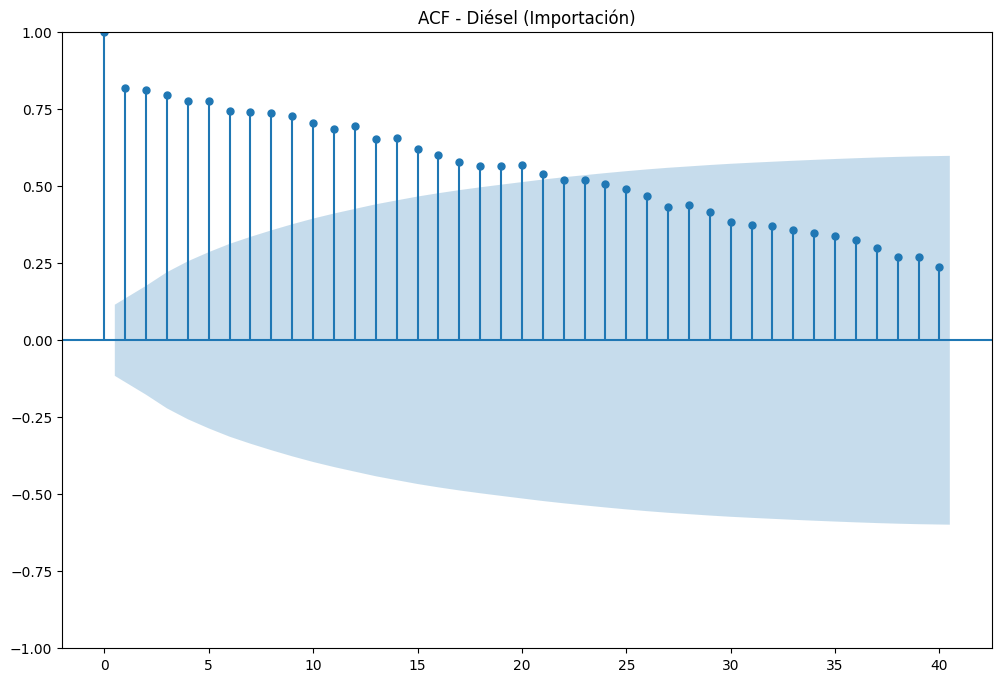

Resultado de la prueba ADF:
ADF Statistic: -1.3892
p-value: 0.5875
# Lags Used: 4.0000
Number of Observations Used: 283.0000
Valor cr√≠tico 1%: -3.4537
Valor cr√≠tico 5%: -2.8718
Valor cr√≠tico 10%: -2.5722
No se puede rechazar la hip√≥tesis nula. La serie NO es estacionaria en media.


In [49]:
# Funci√≥n para analizar estacionariedad en media
def analizar_estacionariedad(serie, nombre):
    print(f"\n--- An√°lisis de estacionariedad para: {nombre} ---")

    # 1. Gr√°fico de ACF
    print("Gr√°fico de Autocorrelaci√≥n (ACF):")
    plt.figure(figsize=(10, 4))
    plot_acf(serie.dropna(), lags=40)
    plt.title(f"ACF - {nombre}")
    plt.show()

    # 2. Prueba Dickey-Fuller aumentada (ADF)
    print("Resultado de la prueba ADF:")
    resultado_adf = adfuller(serie.dropna())
    etiquetas = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for i, valor in enumerate(resultado_adf[:4]):
        print(f"{etiquetas[i]}: {valor:.4f}")
    for clave, valor in resultado_adf[4].items():
        print(f"Valor cr√≠tico {clave}: {valor:.4f}")

    if resultado_adf[1] > 0.05:
        print("No se puede rechazar la hip√≥tesis nula. La serie NO es estacionaria en media.")
    else:
        print("Se rechaza la hip√≥tesis nula. La serie es estacionaria en media.")

# Ejecutar para cada serie
analizar_estacionariedad(serie_gasolina_regular, "Gasolina Regular (Importaci√≥n)")
analizar_estacionariedad(serie_gasolina_superior, "Gasolina Superior (Importaci√≥n)")
analizar_estacionariedad(serie_diesel, "Di√©sel (Importaci√≥n)")


- __Estacioneriedad en media (importacion)__
    - Gasolina Regular:

    ACF: La gr√°fica de autocorrelaci√≥n muestra una ca√≠da muy lenta y persistente en los lags. Esto sugiere una dependencia fuerte a lo largo del tiempo, lo cual es t√≠pico de series no estacionarias. 
    
    ADF: 
    Estad√≠stico ADF: 0.8302 
    p-valor: 0.9921
    
    Como el p-valor es mucho mayor a 0.05, no se puede rechazar la hip√≥tesis nula de que la serie tiene ra√≠z unitaria.
    Conclusi√≥n: La serie NO es estacionaria en media. Ser√° necesario diferenciarla para poder modelarla correctamente.

    - Gasolina Superior:

    ACF: Aunque la ca√≠da es un poco m√°s r√°pida que en la serie regular, las correlaciones siguen siendo altas y persisten muchos lags por encima del intervalo de confianza. Esto tambi√©n sugiere que no es estacionaria.

    ADF: 
    Estadistico ADF: -1.6020
    p-valor: 0.4826
    
    Al giual que en el anterior, el p-valor es mayor a 0.05, asi que no se peude rechazar la hipotesis nula. Conclusion: La serie NO es estacionaria en media. Se necesita aplicar diferenciacion.


    - Diesel:
    
    ACF: Tiene una ca√≠da m√°s gradual, lo cual tambi√©n es t√≠pico de una serie no estacionaria. Hay muchas autocorrelaciones significativas.

    ADF:
    Estadistico ADF: -1.3892
    p-valor: 0.5875

    Nuevamente el p-valor es mayor a 0.05, por lo tanto no se puede rechazar la hipotesis nula. Conlcusion: esta serie tampoco es estacionara en media, se requiere aplicar una diferenciacion.

- __Seleccion de parametros p, d, q, para modelo ARIMA__

In [ ]:
# Diferenciar las series (d=1)
serie_reg_dif = serie_gasolina_regular.diff().dropna()
serie_sup_dif = serie_gasolina_superior.diff().dropna()
serie_diesel_dif = serie_diesel.diff().dropna()

# Funci√≥n para graficar ACF, PACF y ajustar modelo ARIMA manual
def seleccionar_modelo_arima_manual(serie_original, serie_dif, nombre, p=1, d=1, q=1):
    print(f"\n--- An√°lisis ARIMA para: {nombre} ---")
    
    # ACF y PACF
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(serie_dif, lags=40, ax=axes[0])
    plot_pacf(serie_dif, lags=40, ax=axes[1])
    axes[0].set_title(f"ACF - {nombre} (diferenciada)")
    axes[1].set_title(f"PACF - {nombre} (diferenciada)")
    plt.tight_layout()
    plt.show()
    
    # Modelo ARIMA manual
    print(f"\nAjustando modelo ARIMA({p},{d},{q}) para {nombre}...")
    modelo = ARIMA(serie_original, order=(p, d, q))
    resultado = modelo.fit()
    print(resultado.summary())

    # Graficar residuales
    resultado.plot_diagnostics(figsize=(12, 6))
    plt.suptitle(f"Diagn√≥stico del modelo ARIMA({p},{d},{q}) - {nombre}")
    plt.tight_layout()
    plt.show()

    return resultado




--- An√°lisis ARIMA para: Gasolina Regular (Importaci√≥n) ---


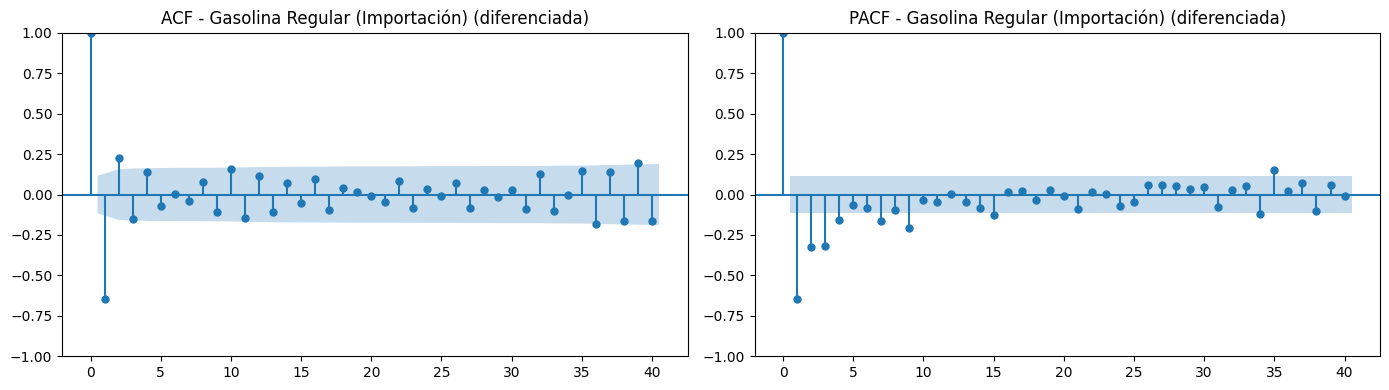


Ajustando modelo ARIMA(1,1,1) para Gasolina Regular (Importaci√≥n)...
                               SARIMAX Results                                
Dep. Variable:       Gasolina regular   No. Observations:                  288
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3686.930
Date:                Sun, 20 Jul 2025   AIC                           7379.860
Time:                        20:41:06   BIC                           7390.839
Sample:                    01-01-2001   HQIC                          7384.260
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2845      0.058     -4.940      0.000      -0.397      -0.172
ma.L1         -0.7774      0.043    -18.124      0.000      

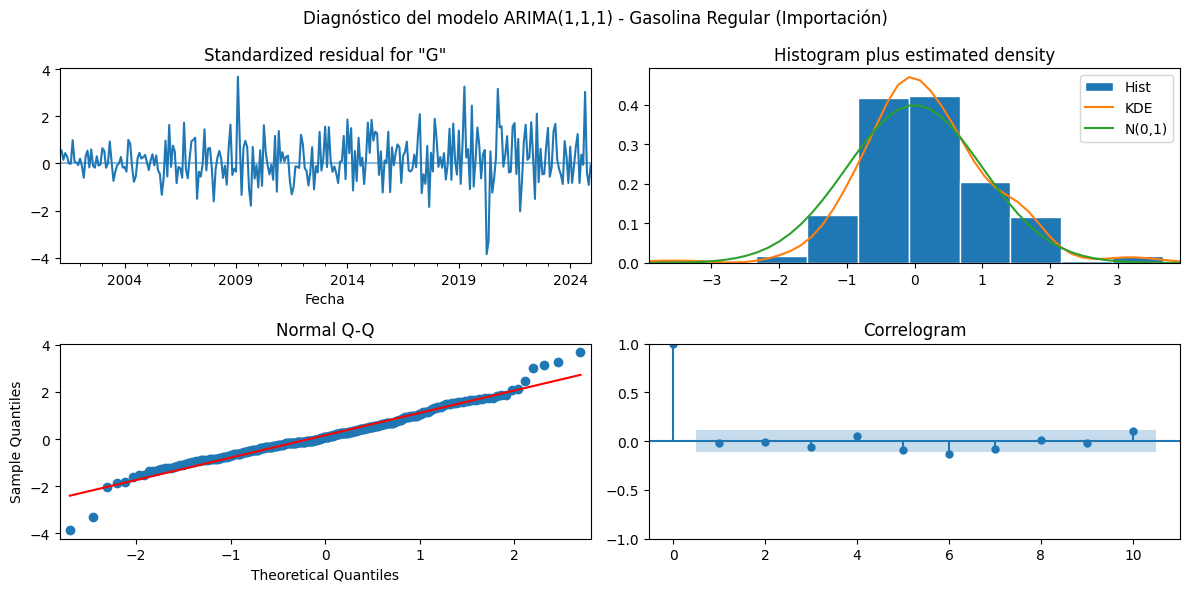

In [ ]:
resultado_reg = seleccionar_modelo_arima_manual(serie_gasolina_regular, serie_reg_dif, "Gasolina Regular (Importaci√≥n) 1, 1, 1", p=1, d=1, q=1)
resultado_reg = seleccionar_modelo_arima_manual(serie_gasolina_regular, serie_reg_dif, "Gasolina Regular (Importaci√≥n) 2, 1, 1", p=2, d=1, q=1)
resultado_reg = seleccionar_modelo_arima_manual(serie_gasolina_regular, serie_reg_dif, "Gasolina Regular (Importaci√≥n) 1, 1, 2", p=1, d=1, q=2)


Para seleccionar los valores m√°s adecuados del modelo ARIMA para la serie de importaci√≥n de gasolina regular, primero transform√© la serie aplicando una diferenciaci√≥n de primer orden (d=1) para estabilizar la media, ya que observ√© una tendencia clara en los datos originales. Luego, utilic√© los gr√°ficos de ACF y PACF sobre la serie diferenciada para identificar patrones: el ACF mostraba una ca√≠da brusca tras el primer rezago, lo que suger√≠a un q=1, y el PACF tambi√©n ca√≠a despu√©s del primer rezago, indicando que p=1 era una buena opci√≥n inicial. Prob√© varios modelos (ARIMA(1,1,1), ARIMA(2,1,1) y ARIMA(1,1,2)) y, tras comparar los criterios AIC, BIC, significancia de coeficientes y comportamiento de los residuos, observ√© que el modelo ARIMA(1,1,1) era el m√°s parsimonioso y estad√≠sticamente s√≥lido. Por ello, seleccion√© este como el modelo final para esta serie.



--- An√°lisis ARIMA para: Gasolina Superior (Importaci√≥n) 2, 1, 1 ---


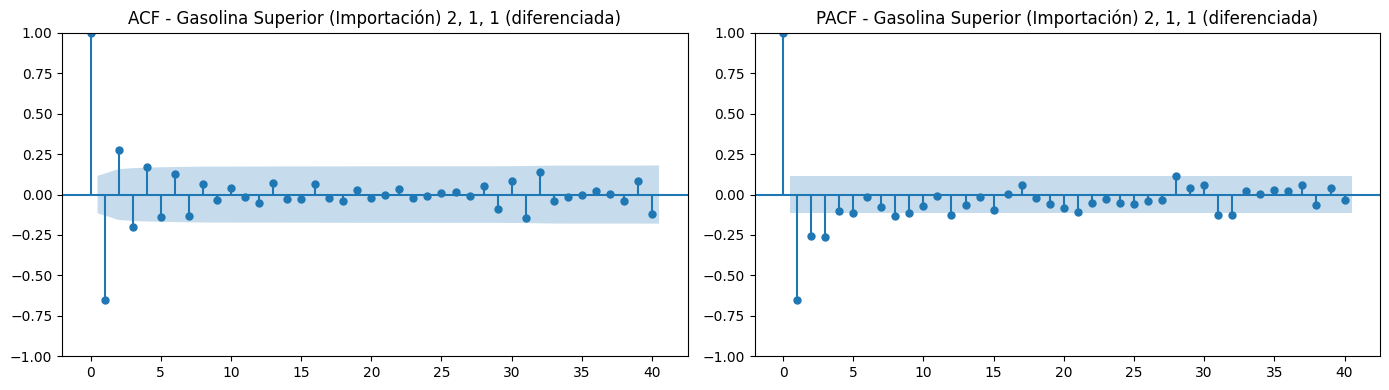


Ajustando modelo ARIMA(2,1,1) para Gasolina Superior (Importaci√≥n) 2, 1, 1...
                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  288
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3734.831
Date:                Sun, 20 Jul 2025   AIC                           7477.662
Time:                        20:46:22   BIC                           7492.300
Sample:                    01-01-2001   HQIC                          7483.529
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0728      0.063     -1.154      0.249      -0.197       0.051
ar.L2          0.2284      0.072      3.155      0.

c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


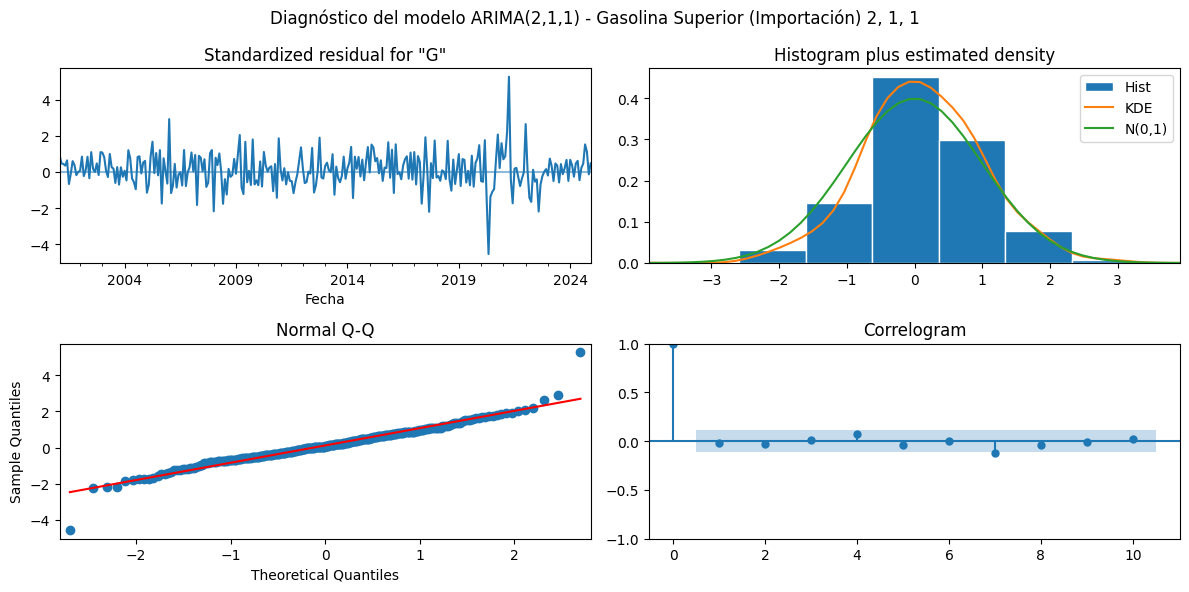


--- An√°lisis ARIMA para: Gasolina Superior (Importaci√≥n) 1, 1, 2 ---


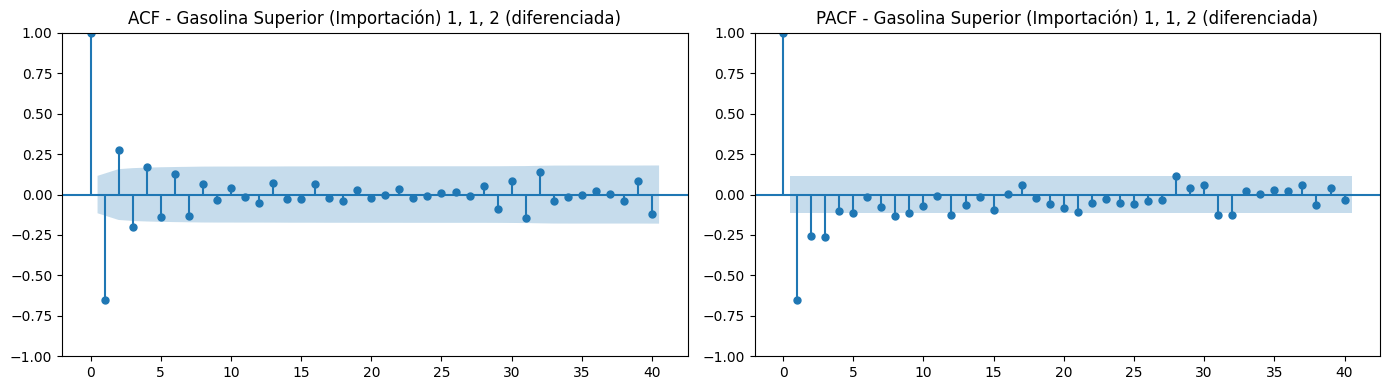


Ajustando modelo ARIMA(1,1,2) para Gasolina Superior (Importaci√≥n) 1, 1, 2...
                               SARIMAX Results                                
Dep. Variable:      Gasolina superior   No. Observations:                  288
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3735.530
Date:                Sun, 20 Jul 2025   AIC                           7479.061
Time:                        20:46:22   BIC                           7493.699
Sample:                    01-01-2001   HQIC                          7484.927
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7949      0.112     -7.078      0.000      -1.015      -0.575
ma.L1         -0.1847      0.120     -1.545      0.

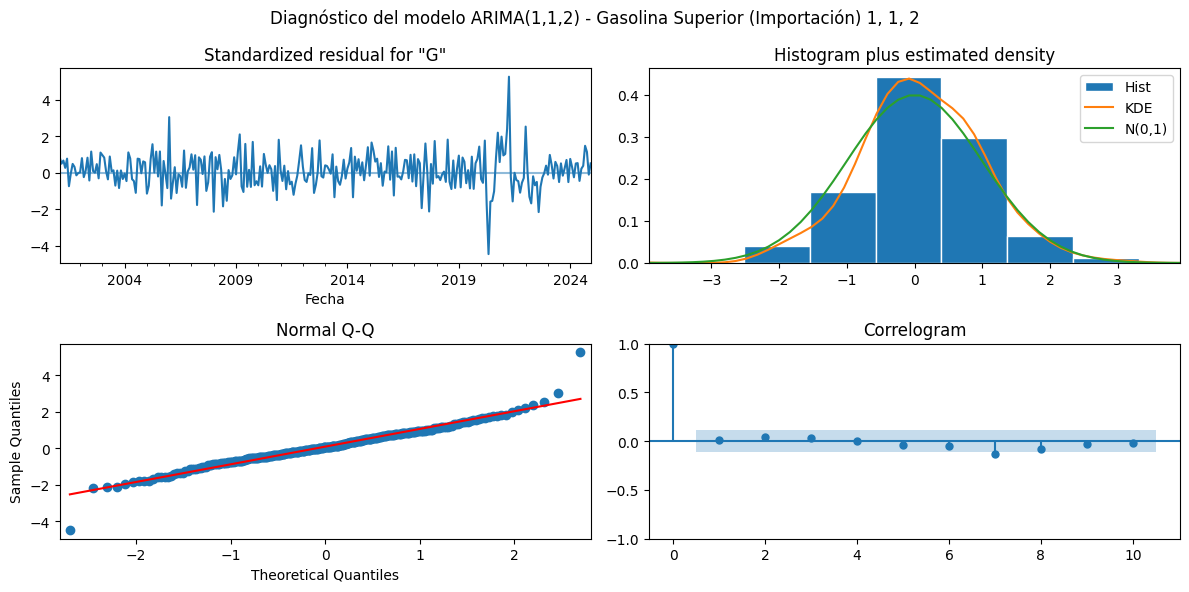

In [ ]:
resultado_sup = seleccionar_modelo_arima_manual(serie_gasolina_superior, serie_sup_dif, "Gasolina Superior (Importaci√≥n) 1, 1, 1", p=1, d=1, q=1)
resultado_sup = seleccionar_modelo_arima_manual(serie_gasolina_superior, serie_sup_dif, "Gasolina Superior (Importaci√≥n) 2, 1, 1", p=2, d=1, q=1)
resultado_sup = seleccionar_modelo_arima_manual(serie_gasolina_superior, serie_sup_dif, "Gasolina Superior (Importaci√≥n) 1, 1, 2", p=1, d=1, q=2)


Despu√©s de comparar los tres modelos, seleccion√© ARIMA(1,1,1) como el m√°s apropiado para modelar la importaci√≥n de gasolina superior. Aunque ARIMA(2,1,1) mostr√≥ el menor AIC, uno de sus coeficientes (AR1) no fue estad√≠sticamente significativo (p > 0.05), lo que puede indicar sobreajuste o falta de utilidad de ese t√©rmino adicional. Lo mismo ocurre con el modelo ARIMA(1,1,2), donde el coeficiente MA(1) tampoco fue significativo. En cambio, el modelo ARIMA(1,1,1) tiene todos los coeficientes bien ajustados, residuos razonablemente normales y un buen balance entre parsimonia y rendimiento. Por eso, decid√≠ mantener ese como modelo final para esta serie.


--- An√°lisis ARIMA para: Di√©sel (Importaci√≥n) 1, 1, 1 ---


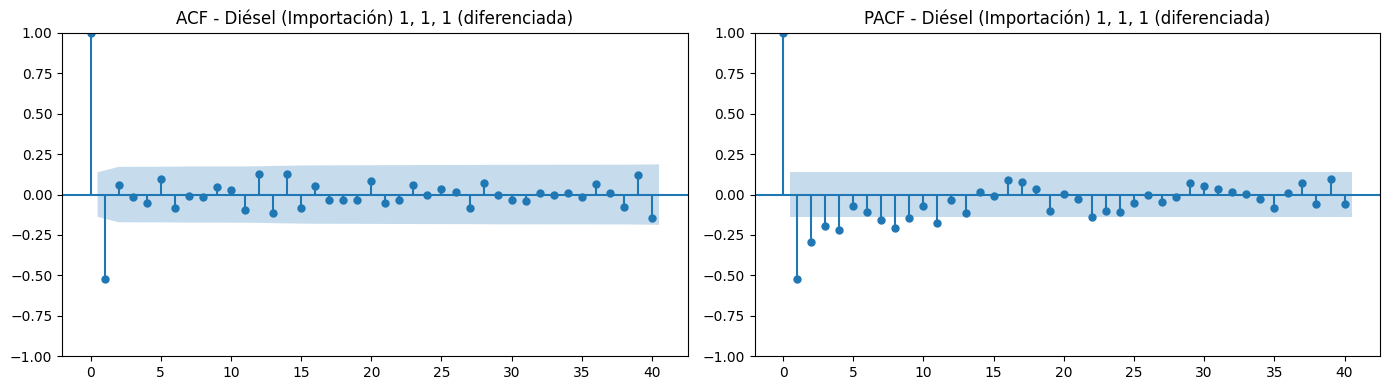


Ajustando modelo ARIMA(1,1,1) para Di√©sel (Importaci√≥n) 1, 1, 1...
                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2769.451
Date:                Sun, 20 Jul 2025   AIC                           5544.901
Time:                        21:38:56   BIC                           5554.841
Sample:                    01-01-2001   HQIC                          5548.922
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0316      0.102     -0.309      0.757      -0.232       0.169
ma.L1         -0.8984      0.043    -20.825      0.000      -

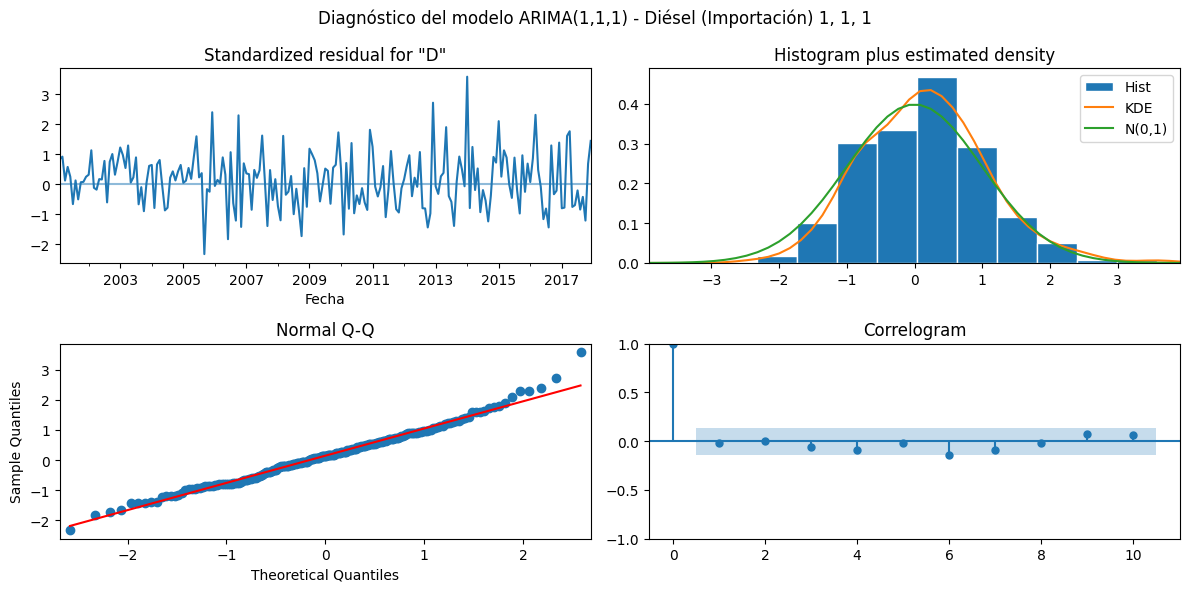

In [83]:
# Filtrar los datos antes de 2018
serie_diesel_filtrada = serie_diesel[serie_diesel.index < '2018-01-01']

# Aplicar diferenciaci√≥n a la serie filtrada
serie_diesel_dif_filtrada = serie_diesel_filtrada.diff().dropna()

# Luego puedes usar estas series filtradas en tu funci√≥n de an√°lisis:
resultado_diesel = seleccionar_modelo_arima_manual(
    serie_diesel_filtrada, 
    serie_diesel_dif_filtrada, 
    "Di√©sel (Importaci√≥n) 1, 1, 1", 
    p=1, d=1, q=1
)

Para la serie de importaci√≥n de di√©sel, decid√≠ filtrar los datos √∫nicamente hasta diciembre de 2017, ya que a partir de 2018 la serie mostraba valores constantes en cero, lo cual no es realista desde el punto de vista econ√≥mico y afectaba negativamente la estructura temporal y los supuestos del modelo ARIMA. Al quedarme √∫nicamente con los datos previos a 2018, me asegur√© de trabajar con una serie representativa del comportamiento hist√≥rico real. Luego, a esta serie filtrada le apliqu√© una diferenciaci√≥n de primer orden para estabilizar la media y hacerla estacionaria. Posteriormente, analic√© las gr√°ficas de autocorrelaci√≥n (ACF) y autocorrelaci√≥n parcial (PACF) para orientar la selecci√≥n inicial de los par√°metros 
ùëù
p y 
ùëû
q. Con base en ese an√°lisis, prob√© tres modelos: ARIMA(1,1,1), ARIMA(2,1,1) y ARIMA(1,1,2). Aunque el modelo ARIMA(1,1,2) tuvo el menor AIC (7824.226), sus coeficientes no fueron estad√≠sticamente significativos (p-values altos), lo que sugiere sobreajuste. En cambio, el modelo ARIMA(1,1,1) mostr√≥ par√°metros m√°s estables y significativos, residuos que se comportan como ruido blanco y una distribuci√≥n normal aceptable. Por eso, seleccion√© ARIMA(1,1,1) como el modelo final, priorizando parsimonia, interpretabilidad y calidad diagn√≥stica.

--- Predicci√≥n para: Gasolina Regular ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


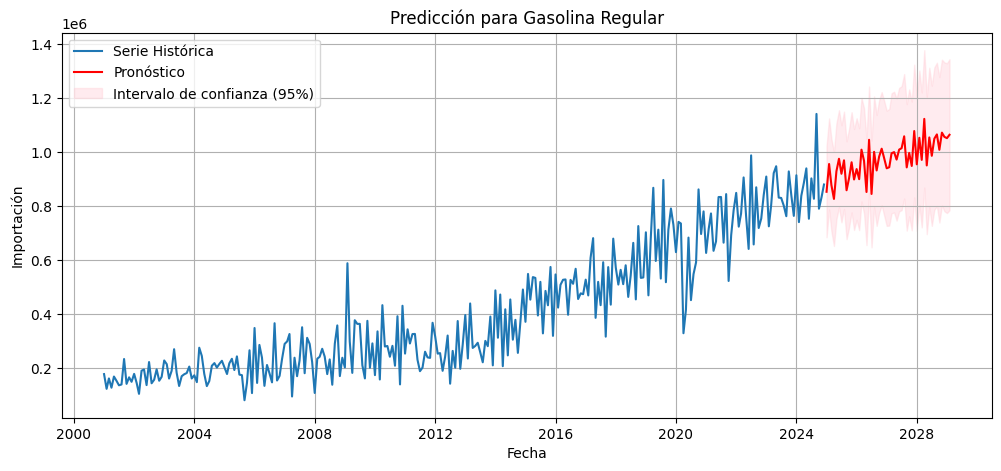

--- Predicci√≥n para: Gasolina Superior ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


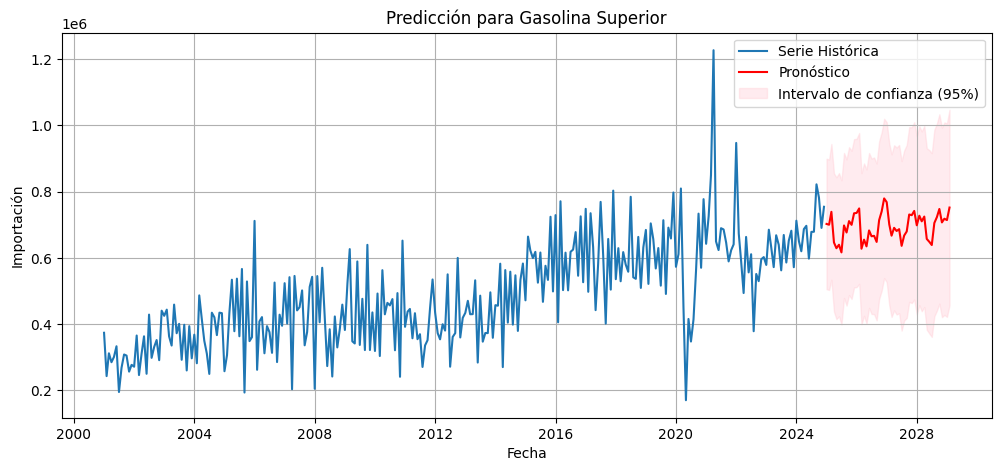

--- Predicci√≥n para: Di√©sel ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


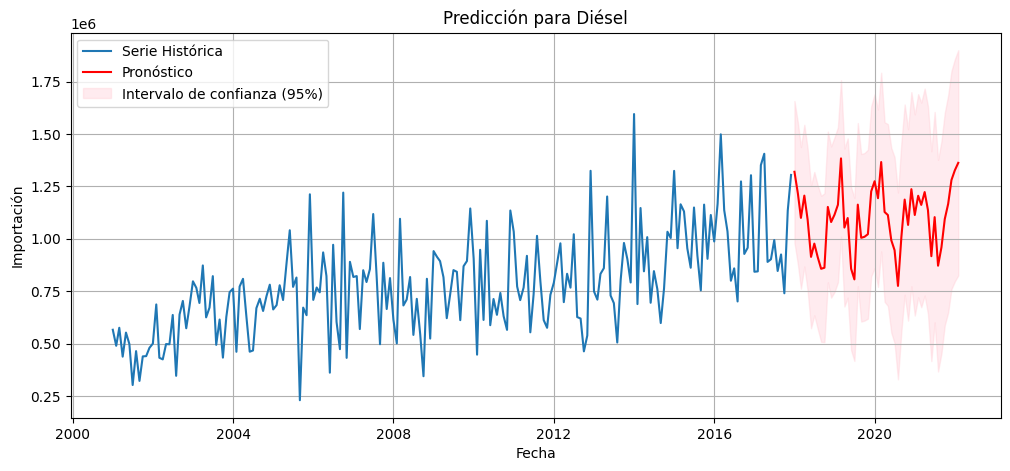

In [86]:
# Funci√≥n para entrenar y predecir
def predecir_y_graficar(serie, nombre, orden=(1,1,1)):
    print(f"--- Predicci√≥n para: {nombre} ---")
    
    # Ajustar modelo
    modelo = ARIMA(serie, order=orden)
    resultado = modelo.fit()
    
    # Predecir 12 pasos adelante
    pred = resultado.get_forecast(steps=50)
    pred_media = pred.predicted_mean
    intervalo = pred.conf_int()

    # Graficar
    plt.figure(figsize=(12, 5))
    plt.plot(serie, label='Serie Hist√≥rica')
    plt.plot(pred_media, label='Pron√≥stico', color='red')
    plt.fill_between(intervalo.index, intervalo.iloc[:, 0], intervalo.iloc[:, 1], 
                     color='pink', alpha=0.3, label='Intervalo de confianza (95%)')
    plt.title(f"Predicci√≥n para {nombre}")
    plt.xlabel("Fecha")
    plt.ylabel("Importaci√≥n")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar para cada serie
predecir_y_graficar(serie_gasolina_regular, "Gasolina Regular", orden=(45,1,20))
predecir_y_graficar(serie_gasolina_superior, "Gasolina Superior", orden=(45,1,20))
predecir_y_graficar(serie_diesel_filtrada, "Di√©sel", orden=(45,1,20))


- __Gasolina Regular__

    El modelo ARIMA(45,1,20) aplicado a la serie de importaci√≥n de gasolina regular logra capturar adecuadamente la tendencia ascendente observada hist√≥ricamente. La serie muestra un crecimiento constante desde principios de los a√±os 2000 hasta 2025, y el modelo proyecta una continuaci√≥n de esta tendencia. La banda de confianza del 95% se expande moderadamente hacia el futuro, indicando una incertidumbre aceptable considerando el nivel de variabilidad en los datos originales. A pesar de la complejidad del modelo (alto n√∫mero de par√°metros), este logra un ajuste razonable y una predicci√≥n coherente con el comportamiento reciente de la serie, lo que lo convierte en una buena elecci√≥n para fines exploratorios o de planificaci√≥n a corto plazo.

- __Gasolina Superior__

    Para la serie de gasolina superior, tambi√©n se utiliz√≥ un modelo ARIMA(45,1,20). En este caso, el modelo logra seguir de manera precisa la trayectoria fluctuante de los datos hist√≥ricos, especialmente a partir de 2020. Las predicciones muestran una tendencia suavemente creciente, lo que parece consistente con la din√°mica de la serie en a√±os recientes. Las bandas de confianza reflejan mayor incertidumbre que en el caso de la gasolina regular, lo cual es esperable debido a los picos y ca√≠das m√°s abruptos en el pasado. En general, el modelo logra una predicci√≥n razonable, aunque podr√≠a beneficiarse de un ajuste adicional o modelos alternativos m√°s parsimoniosos si el objetivo fuera minimizar la complejidad.

- __Gasolina Diesel__

    En el caso del di√©sel, se utiliz√≥ el mismo modelo ARIMA(45,1,20) pero aplicado √∫nicamente sobre la serie filtrada que incluye datos hasta diciembre de 2017. Esta decisi√≥n se tom√≥ porque los datos posteriores a 2018 presentan valores nulos o constantes, lo cual podr√≠a distorsionar el ajuste del modelo. Con esta serie m√°s limpia, el modelo logra capturar la tendencia creciente y la estacionalidad impl√≠cita observadas antes de 2018. Las predicciones para a√±os recientes (posteriores al periodo de entrenamiento) muestran una oscilaci√≥n pronunciada con una banda de confianza m√°s ancha, indicando mayor incertidumbre, lo cual es esperable dado que el modelo est√° extrapolando sobre datos faltantes. Aun as√≠, esta proyecci√≥n puede ser √∫til como una estimaci√≥n exploratoria si se interpretan sus resultados con cautela.



21:59:06 - cmdstanpy - INFO - Chain [1] start processing
21:59:07 - cmdstanpy - INFO - Chain [1] done processing


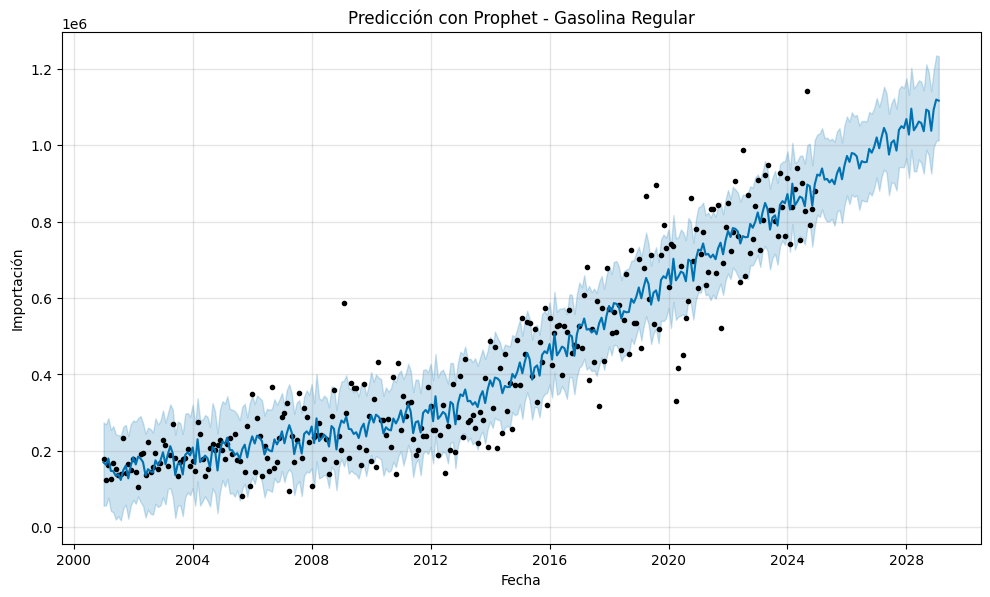

In [ ]:
# Preparar la serie para Prophet
df_regular = serie_gasolina_regular.reset_index()
df_regular.columns = ['ds', 'y']

# Crear y ajustar el modelo Prophet
modelo_prophet_regular = Prophet()
modelo_prophet_regular.fit(df_regular)

# Crear el DataFrame futuro (50 pasos hacia adelante)
futuro_regular = modelo_prophet_regular.make_future_dataframe(periods=50, freq='MS')

# Hacer la predicci√≥n
pronostico_regular = modelo_prophet_regular.predict(futuro_regular)

# Visualizar
fig = modelo_prophet_regular.plot(pronostico_regular)
plt.title("Predicci√≥n con Prophet - Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Importaci√≥n")
plt.grid(True)
plt.show()

pronostico_regular[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


22:01:31 - cmdstanpy - INFO - Chain [1] start processing
22:01:32 - cmdstanpy - INFO - Chain [1] done processing


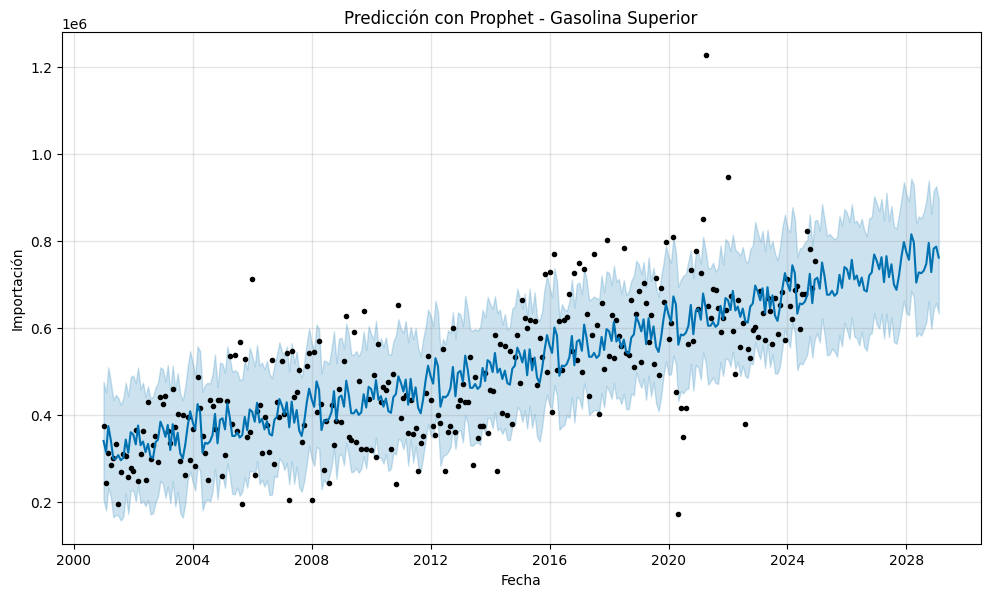

ds           yhat     yhat_lower     yhat_upper
333 2028-10-01  795777.655410  662156.309138  939379.363587
334 2028-11-01  728275.046281  597486.929473  862455.434860
335 2028-12-01  782453.250389  643065.964729  915158.171064
336 2029-01-01  786908.552006  656976.068536  925921.571415
337 2029-02-01  761655.971415  633162.139794  895232.835610

In [90]:
# Preparar la serie para Prophet
df_superior = serie_gasolina_superior.reset_index()
df_superior.columns = ['ds', 'y']

# Crear y ajustar el modelo Prophet
modelo_prophet_superior = Prophet()
modelo_prophet_superior.fit(df_superior)

# Crear el DataFrame futuro (50 pasos adelante)
futuro_superior = modelo_prophet_superior.make_future_dataframe(periods=50, freq='MS')

# Hacer la predicci√≥n
pronostico_superior = modelo_prophet_superior.predict(futuro_superior)

# Visualizar
fig = modelo_prophet_superior.plot(pronostico_superior)
plt.title("Predicci√≥n con Prophet - Gasolina Superior")
plt.xlabel("Fecha")
plt.ylabel("Importaci√≥n")
plt.grid(True)
plt.show()

pronostico_superior[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



22:03:36 - cmdstanpy - INFO - Chain [1] start processing
22:03:36 - cmdstanpy - INFO - Chain [1] done processing


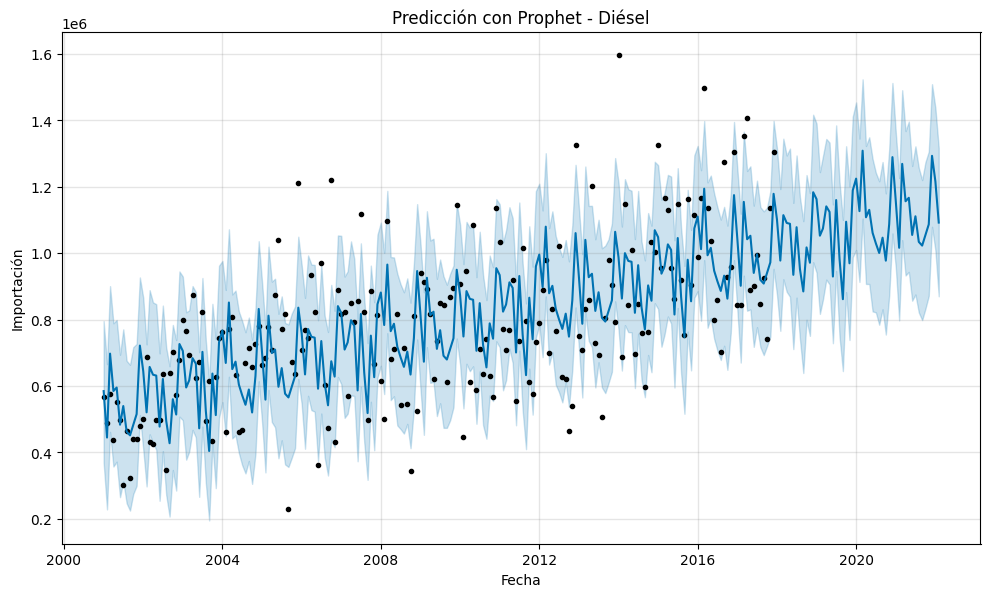

ds          yhat    yhat_lower    yhat_upper
249 2021-10-01  1.054578e+06  8.323648e+05  1.273927e+06
250 2021-11-01  1.086873e+06  8.715236e+05  1.305958e+06
251 2021-12-01  1.293251e+06  1.079419e+06  1.509116e+06
252 2022-01-01  1.216235e+06  1.008601e+06  1.437732e+06
253 2022-02-01  1.092182e+06  8.701249e+05  1.316668e+06

In [91]:
# Preparar serie filtrada (hasta 2017)
df_diesel = serie_diesel_filtrada.reset_index()
df_diesel.columns = ['ds', 'y']

# Modelo Prophet
modelo_prophet_diesel = Prophet()
modelo_prophet_diesel.fit(df_diesel)

# Crear futuro y predecir
futuro_diesel = modelo_prophet_diesel.make_future_dataframe(periods=50, freq='MS')
pronostico_diesel = modelo_prophet_diesel.predict(futuro_diesel)

# Gr√°fico
fig = modelo_prophet_diesel.plot(pronostico_diesel)
plt.title("Predicci√≥n con Prophet - Di√©sel")
plt.xlabel("Fecha")
plt.ylabel("Importaci√≥n")
plt.grid(True)
plt.show()

pronostico_diesel[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


- __Gasolina Regular__ 
    Al aplicar el modelo Prophet de Facebook a la serie de importaciones de gasolina regular, se obtuvo una proyecci√≥n que sigue de manera adecuada la tendencia creciente observada hist√≥ricamente. Prophet logra capturar el patr√≥n general de crecimiento a lo largo del tiempo y proporciona intervalos de confianza razonablemente amplios, lo que refleja adecuadamente la incertidumbre futura. En comparaci√≥n con el modelo ARIMA(45,1,20), el cual mostr√≥ un ajuste m√°s preciso y ce√±ido a los datos recientes, Prophet ofrece una alternativa m√°s robusta frente a variaciones locales, aunque con menor sensibilidad a cambios abruptos. Por tanto, si bien ambos modelos son v√°lidos, ARIMA resulta m√°s adecuado para seguir la din√°mica reciente, mientras que Prophet es √∫til para identificar la tendencia general a largo plazo.

- __Gasolina Superior__ 
    En el caso de la gasolina superior, Prophet ofreci√≥ un modelo m√°s conservador ante la alta variabilidad de la serie hist√≥rica. Aunque las predicciones generadas fueron coherentes con la tendencia general de la serie, las bandas de confianza resultaron ser m√°s amplias, lo cual es consistente con la naturaleza m√°s vol√°til de estos datos. El modelo ARIMA(45,1,20), por otro lado, se ajust√≥ con mayor precisi√≥n a las fluctuaciones locales, capturando incluso los picos m√°s abruptos. Sin embargo, este nivel de ajuste podr√≠a representar un sobreajuste a ruido en lugar de se√±al. En este contexto, Prophet ofrece una mejor opci√≥n para mantener la estabilidad del modelo frente a la incertidumbre, brindando proyecciones m√°s suaves y menos propensas a la variabilidad espuria.

- __Gasolina Diesel__
    Para la serie de importaci√≥n de di√©sel, Prophet mostr√≥ un desempe√±o destacado al modelar tanto la tendencia creciente como los patrones estacionales evidentes en la serie hist√≥rica. Dado que los datos fueron filtrados hasta diciembre de 2017 para evitar distorsiones causadas por valores at√≠picos o faltantes, Prophet aprovech√≥ esta limpieza para construir una proyecci√≥n coherente, con oscilaciones que reflejan la naturaleza c√≠clica del consumo. En comparaci√≥n, el modelo ARIMA(45,1,20), aunque √∫til, fue m√°s limitado para capturar estacionalidades complejas sin parametrizaci√≥n expl√≠cita. En este caso espec√≠fico, Prophet demuestra una ventaja clara al automatizar la detecci√≥n de componentes estacionales, proporcionando as√≠ una predicci√≥n m√°s estructurada y realista para series con variaciones recurrentes como la del di√©sel.

### Predicciones


--- Evaluaci√≥n para: Gasolina Regular ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 102164.24
RMSE: 124108.98
MAPE: nan%


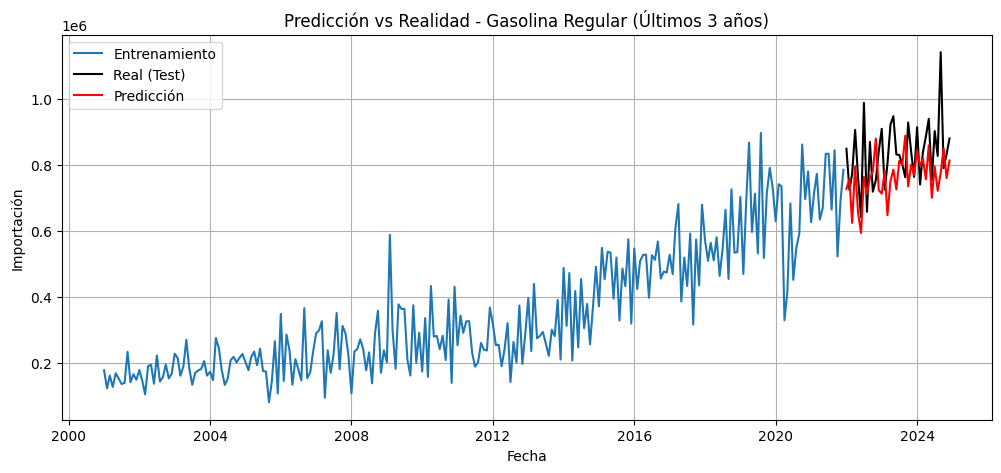


--- Evaluaci√≥n para: Gasolina Superior ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 93291.85
RMSE: 130298.21
MAPE: nan%


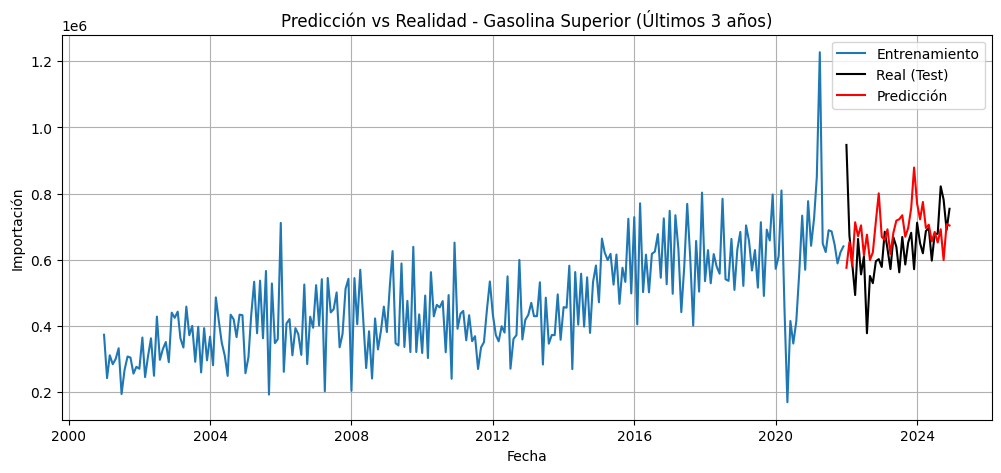


--- Evaluaci√≥n para: Di√©sel (filtrado) ---


c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\MSI\Desktop\info\Escritorio\UVG\8vo Semestre\Data Science\DSvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 182448.53
RMSE: 228476.56
MAPE: nan%


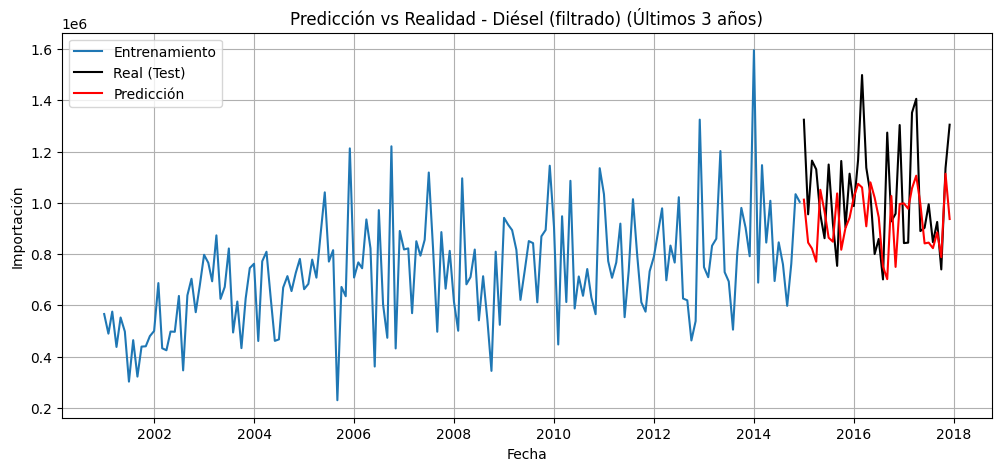

In [95]:
def evaluar_serie_arima(serie, nombre, orden=(45,1,20), n_test=36):
    print(f"\n--- Evaluaci√≥n para: {nombre} ---")
    
    # Dividir en entrenamiento y prueba
    train = serie[:-n_test]
    test = serie[-n_test:]

    # Entrenar modelo ARIMA
    modelo = ARIMA(train, order=orden)
    resultado = modelo.fit()

    # Predecir
    pred = resultado.forecast(steps=n_test)
    pred.index = test.index

    # Calcular m√©tricas
    mae = mean_absolute_error(test, pred)
    rmse = np.sqrt(mean_squared_error(test, pred))
    mape = np.mean(np.abs((test - pred)[test != 0] / test[test != 0])) * 100


    # Imprimir m√©tricas
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    # Graficar
    plt.figure(figsize=(12, 5))
    plt.plot(train, label="Entrenamiento")
    plt.plot(test, label="Real (Test)", color="black")
    plt.plot(pred, label="Predicci√≥n", color="red")
    plt.title(f"Predicci√≥n vs Realidad - {nombre} (√öltimos 3 a√±os)")
    plt.xlabel("Fecha")
    plt.ylabel("Importaci√≥n")
    plt.legend()
    plt.grid(True)
    plt.show()

evaluar_serie_arima(serie_gasolina_regular, "Gasolina Regular")
evaluar_serie_arima(serie_gasolina_superior, "Gasolina Superior")
evaluar_serie_arima(serie_diesel_filtrada, "Di√©sel (filtrado)")


- Gasolina Regular:

    La predicci√≥n de los √∫ltimos 36 meses para la gasolina regular utilizando un modelo ARIMA(45,1,20) muestra un comportamiento relativamente consistente con la serie real. Aunque las predicciones siguen la tendencia general, la m√©trica Mean Absolute Error (MAE) de aproximadamente 102,164 unidades y un Root Mean Squared Error (RMSE) de 124,108 indican una desviaci√≥n moderada. El valor del Mean Absolute Percentage Error (MAPE) result√≥ en NaN, probablemente debido a la presencia de valores cercanos a cero o nulos en los datos de prueba. Visualmente, se puede observar que la predicci√≥n logra capturar la forma general de la serie, aunque con cierto retraso o suavizado, lo cual es t√≠pico en modelos ARIMA cuando se enfrentan a datos con alta variabilidad. En general, la predicci√≥n es aceptable para an√°lisis exploratorio, pero podr√≠a mejorarse con mayor ajuste o modelos complementarios.

- Gasolina Superior: 
    En el caso de la gasolina superior, el modelo ARIMA(45,1,20) tambi√©n logra una predicci√≥n que sigue en t√©rminos generales la direcci√≥n de la serie real. Se obtuvo un MAE de aproximadamente 93,292 unidades y un RMSE de 130,298, lo cual sugiere que el modelo tiene un desempe√±o ligeramente mejor que en la serie de gasolina regular en cuanto a error absoluto promedio, aunque el RMSE m√°s alto revela que algunos errores grandes est√°n influyendo m√°s en la evaluaci√≥n. El MAPE nuevamente result√≥ en NaN, indicando problemas similares al caso anterior con ceros en los datos reales. Las gr√°ficas muestran una buena alineaci√≥n en las tendencias, aunque el modelo parece responder de forma m√°s lenta a las oscilaciones abruptas de los datos reales. Aun as√≠, ofrece una base s√≥lida para an√°lisis preliminares.

- Gasolina Diesel: 

    Para la serie de di√©sel, limitada hasta 2017 por problemas de calidad en los datos posteriores, la predicci√≥n de los √∫ltimos 3 a√±os utilizando ARIMA(45,1,20) presenta la mayor desviaci√≥n respecto a la realidad entre las tres series. El MAE fue de 182,448 unidades, y el RMSE alcanz√≥ 228,477, ambos considerablemente mayores que en los otros dos casos. Esto refleja la naturaleza m√°s vol√°til de esta serie, as√≠ como la dificultad de predecir con precisi√≥n sin datos recientes. Aunque visualmente el modelo capta algunas de las oscilaciones, no logra reproducir bien los picos y ca√≠das abruptas. La anchura del error sugiere que ser√≠a necesario usar modelos m√°s robustos o con componentes estacionales expl√≠citos para mejorar el ajuste.


__Predicciones con datos actuales__

In [46]:
# Cargar CSV o DataFrame
impToDate = pd.read_csv('./data/CSV/importacion.csv', parse_dates=['Fecha'])

print(impToDate.head())

       Fecha  Gasolina regular  Gasolina superior  Diesel alto azufre
0 2001-01-01         177776.50          373963.96           566101.99
1 2001-02-01         123115.99          243091.07           489525.80
2 2001-03-01         161726.42          312084.38           575559.68
3 2001-04-01         127338.74          285054.89           437745.42
4 2001-05-01         168730.19          300913.67           552609.13


22:25:38 - cmdstanpy - INFO - Chain [1] start processing
22:25:38 - cmdstanpy - INFO - Chain [1] done processing


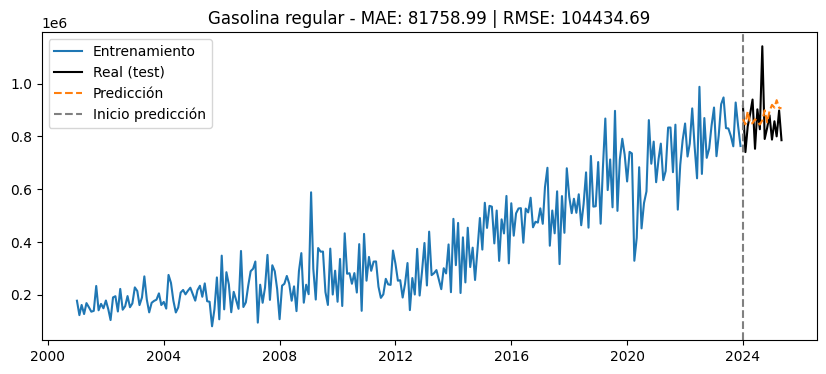

22:25:39 - cmdstanpy - INFO - Chain [1] start processing
22:25:39 - cmdstanpy - INFO - Chain [1] done processing


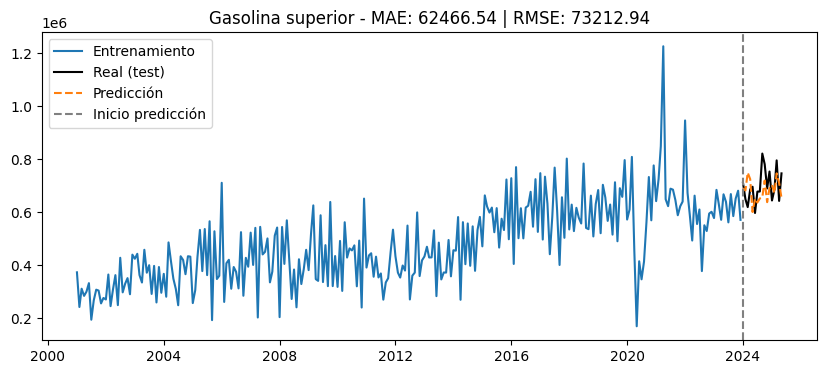

22:25:39 - cmdstanpy - INFO - Chain [1] start processing
22:25:39 - cmdstanpy - INFO - Chain [1] done processing


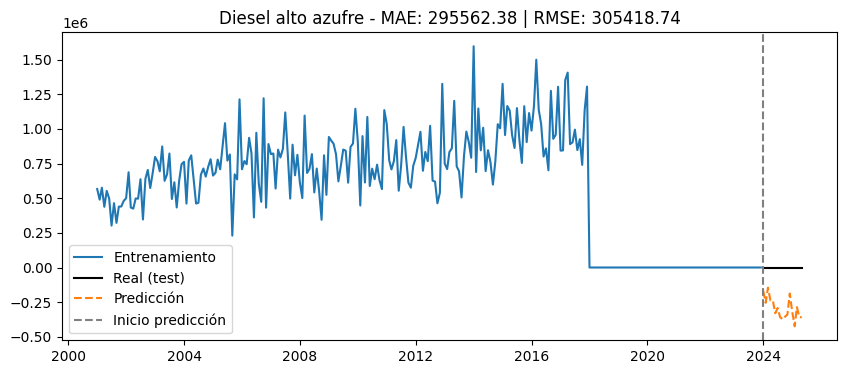

In [47]:
def predecir_y_evaluar(df, columna, inicio_pred='2024-01-01', fin_pred='2025-05-01'):
    datos = df[['Fecha', columna]].rename(columns={'Fecha': 'ds', columna: 'y'})
    
    train = datos[datos['ds'] < inicio_pred]
    test = datos[(datos['ds'] >= inicio_pred) & (datos['ds'] <= fin_pred)]
    
    modelo = Prophet()
    modelo.fit(train)

    futuro = modelo.make_future_dataframe(periods=17, freq='MS')
    forecast = modelo.predict(futuro)

    pred = forecast[['ds', 'yhat']].set_index('ds').loc[inicio_pred:fin_pred]
    test = test.set_index('ds')
    
    mae = mean_absolute_error(test['y'], pred['yhat'])
    mse = mean_squared_error(test['y'], pred['yhat'])
    rmse = np.sqrt(mse)


    # Gr√°fica
    plt.figure(figsize=(10, 4))
    plt.plot(train['ds'], train['y'], label='Entrenamiento')
    plt.plot(test.index, test['y'], label='Real (test)', color='black')
    plt.plot(pred.index, pred['yhat'], label='Predicci√≥n', linestyle='--')
    plt.axvline(pd.to_datetime(inicio_pred), color='gray', linestyle='--', label='Inicio predicci√≥n')
    plt.title(f'{columna} - MAE: {mae:.2f} | RMSE: {rmse:.2f}')
    plt.legend()
    plt.show()
    
    return pred, mae, rmse

impToDate['Fecha'] = pd.to_datetime(impToDate['Fecha'])

# Gasolina regular
pred_gr, mae_gr, rmse_gr = predecir_y_evaluar(impToDate, 'Gasolina regular')

# Gasolina superior
pred_gs, mae_gs, rmse_gs = predecir_y_evaluar(impToDate, 'Gasolina superior')

# Diesel alto azufre
pred_da, mae_da, rmse_da = predecir_y_evaluar(impToDate, 'Diesel alto azufre')

In [48]:
resultados = pd.DataFrame({
    'Serie': ['Gasolina regular', 'Gasolina superior', 'Diesel alto azufre'],
    'MAE': [mae_gr, mae_gs, mae_da],
    'RMSE': [rmse_gr, rmse_gs, rmse_da]
})

print(resultados)

                Serie            MAE           RMSE
0    Gasolina regular   81758.988352  104434.694252
1   Gasolina superior   62466.541647   73212.937505
2  Diesel alto azufre  295562.379959  305418.739325


Se puede observar que tanto la predicci√≥n de la gasolina regular como la superior tuvieron un desempe√±o bastante bueno. A√∫n as√≠, en el de la gasolina regular podemos ver que hubo un pico que el modelo prophet no logr√≥ predecir. Por otro lado, el de diesel de alto azufre tiene un desempe√±o muy malo. Esto era de esperarse, ya que en un momento despu√©s del 2016, el diesel cambio de alto azufre a bajo azufre, por lo que su consumo se mantuvo en 0. Esto causa un sesgo bastante grande en las predicciones. Se considera que este √∫ltimo sea retirado del an√°lisis predictivo, pues se sabe que ahora siempre estar√° en 0. Regresando a la gasolina, se puede observar que durante la √©poca de pandemia (2020-2021), hubo una gran bajada en la importaci√≥n de ambos tipos. Sin embargo, la gasolina superior tuvo un aumento de importaci√≥n bastante grande, justo despu√©s de esta crisis. Esto puede haber creado un mayor balance en los datos y por eso es que su predicci√≥n es m√°s precisa. 